# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#reading and manipulating data
import pandas as pd
import numpy as np

#data visualization
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#split data
from sklearn.model_selection import train_test_split

#to build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

#build decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#find hyperparameters
from sklearn.model_selection import GridSearchCV

#different measures we might use, dpending on context
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [ ]:
#reading csv into variable 'data'
data_og = pd.read_csv('INNHotelsGroup.csv')

In [ ]:
data = data_og.copy()

In [ ]:
#show first 5 datapoints
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
#show last 5 datapoints
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

Looks like I have several independent variables, and one y variable (cancelled or not), which is encoded by what looks to be a string

In [ ]:
#show num of rows, columns
data.shape

(36275, 19)

19 columns, 36275 rows

In [ ]:
#check for duplicates
data.duplicated().sum()

0

No duplicates - good

In [ ]:
#show percentage of bookings that were and were not cancelled
data['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

It looks like almost 33% of the bookings were cancelled, which is a significant portion. This shows how important this analysis will be for saving money for this company.

In [ ]:
#show statistics for each numerical variable
data.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

Only 14/19 variables included in statistics table


Some things that stand out to me:

- arrival year is between 2017-2018, so this data is only from those years

- within those years, the data is from all year round (months 1-12, date 1-31)

- many helpful variables included

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

No null datapoints

Booking id is object, meal plan, room_type_reserved, market_segment_type, and booking_status are all objects too - will have to change this before analysis

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Data Analysis

In [ ]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
#I am going to drop booking id because it is irrelavant to data analysis
data.drop('Booking_ID', axis=1, inplace=True);

In [ ]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
#create function to make a histogram and boxplot for each variable when called on

def plot_hist_bar(var, figsize=(7, 4)):
  #create histogram
  plt.figure(figsize=figsize)
  plt.xticks(rotation=90)
  hist = sns.histplot(data=data, x=var, kde=False) #create histogram

  #add mean and median lines if the variable is numeric (int or float)
  if data[var].dtype == 'int64' or data[var].dtype == 'float64':
    hist.axvline(data[var].mean(), color="green", linestyle="--", label='Mean')
    hist.axvline(data[var].median(), color="black", linestyle="-", label='Median')

  plt.legend()  #show legend with labels
  plt.title(f'Histogram of {var}')  #set plot title
  plt.show()

  #create boxplot
  plt.figure(figsize=figsize)
  plt.xticks(rotation=90)
  box = sns.boxplot(data=data, x=var, showmeans=True) #create boxplot
  plt.title(f'Boxplot of {var}')  #set plot title
  plt.show()

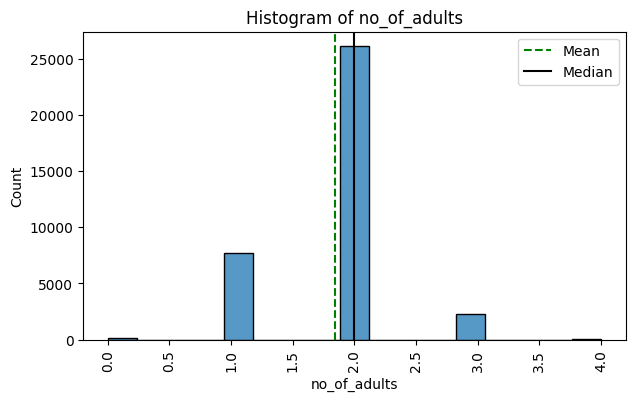

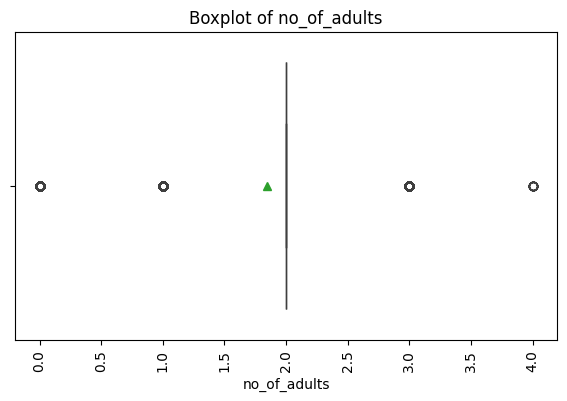

In [ ]:
#create boxplot and histogram for no_of_adults variable
plot_hist_bar('no_of_adults')

usually 2 adults per booking

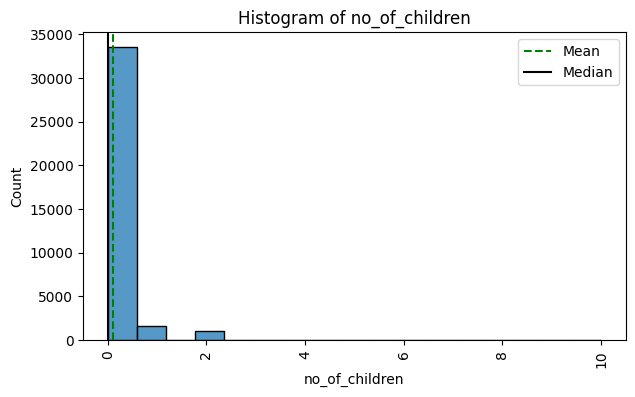

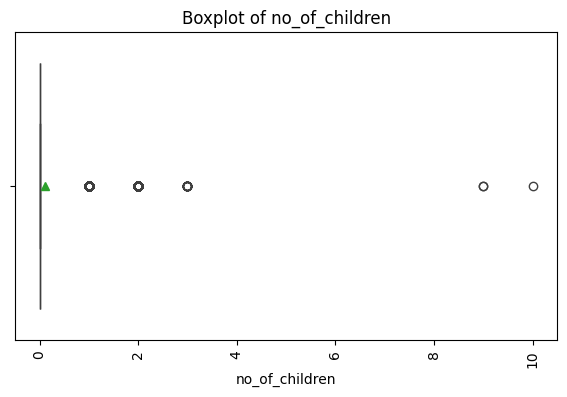

In [ ]:
#create boxplot and histogram for no_of_children variable
plot_hist_bar('no_of_children')

In [ ]:
#check mode to see how many kids is the most common type of booking
data['no_of_children'].mode()

0    0
Name: no_of_children, dtype: int64

Most bookings had 0 children

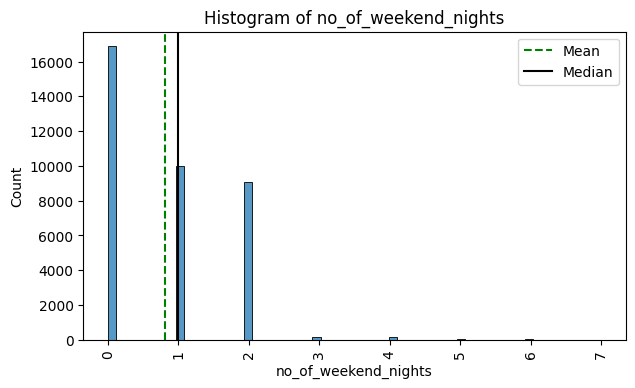

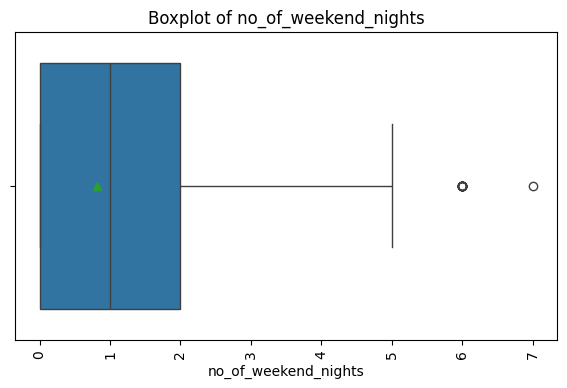

In [ ]:
#create boxplot and histogram for no_of_weekend_nights variable
plot_hist_bar('no_of_weekend_nights')

People often stay 1 weekend night

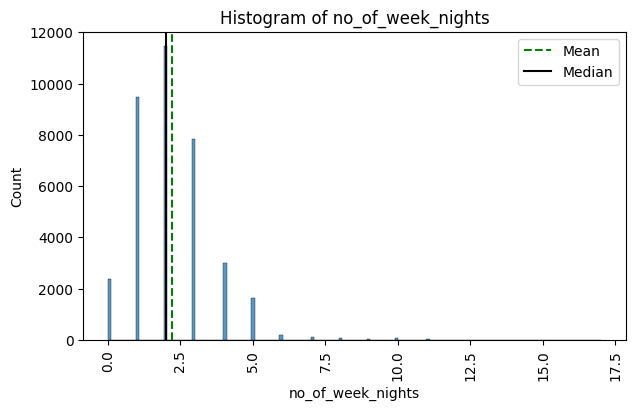

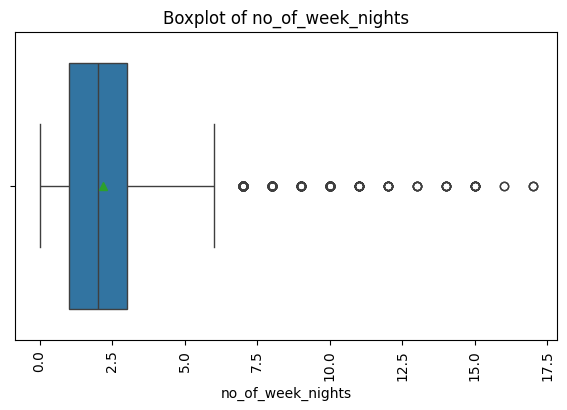

In [ ]:
#create boxplot and histogram for no_of_week_nights variable
plot_hist_bar('no_of_week_nights')

People often stay 2 week nights

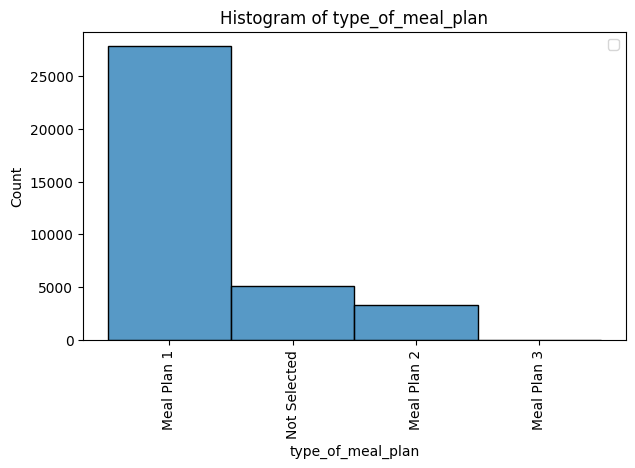

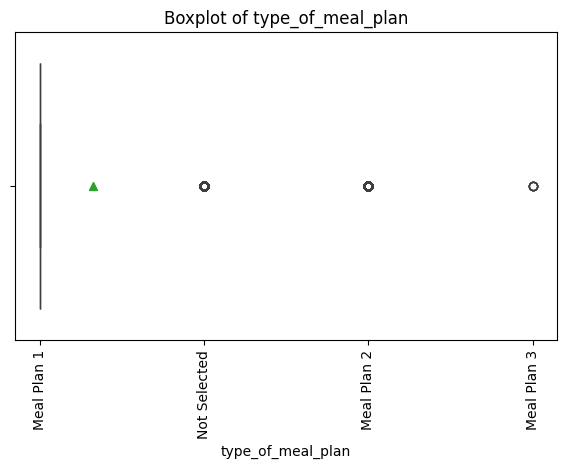

In [ ]:
#create boxplot and histogram for type_of_meal_plan variable
plot_hist_bar('type_of_meal_plan');

1 is most common meal plan

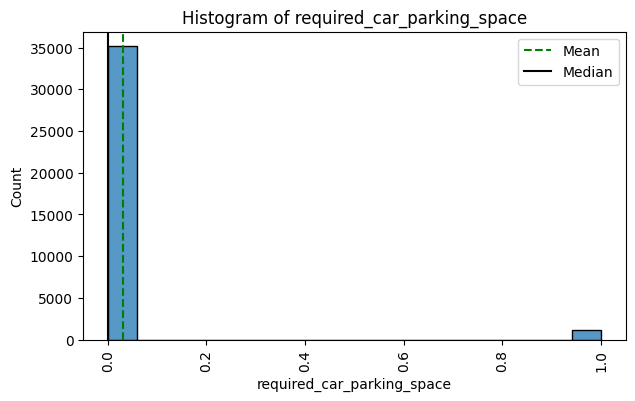

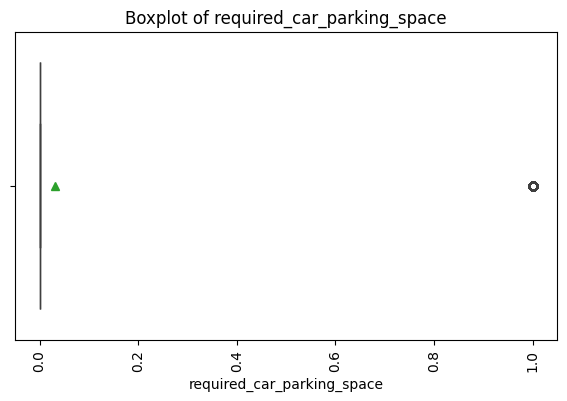

In [ ]:
#create boxplot and histogram for required_car_parking_space variable
plot_hist_bar('required_car_parking_space');

Usually 0 car parking spaces required

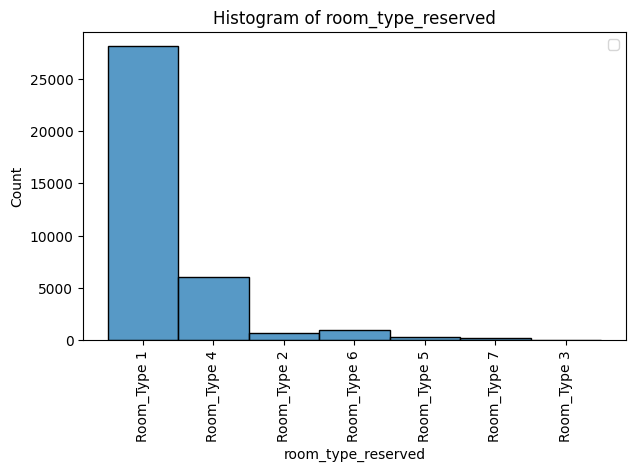

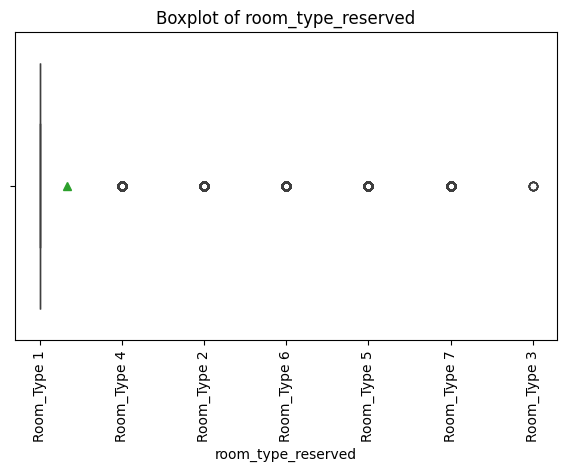

In [ ]:
#create boxplot and histogram for room_type_reserved variable
plot_hist_bar('room_type_reserved')

1 is most common room type

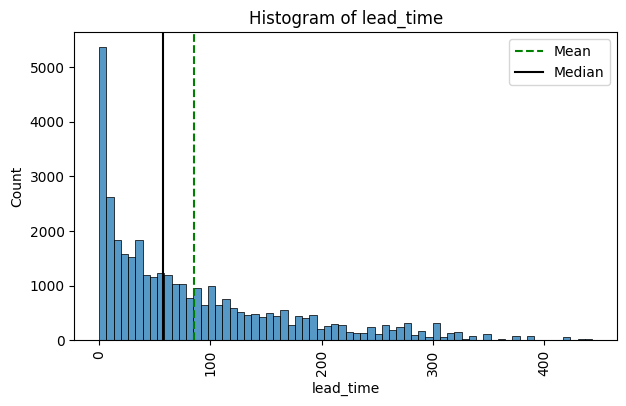

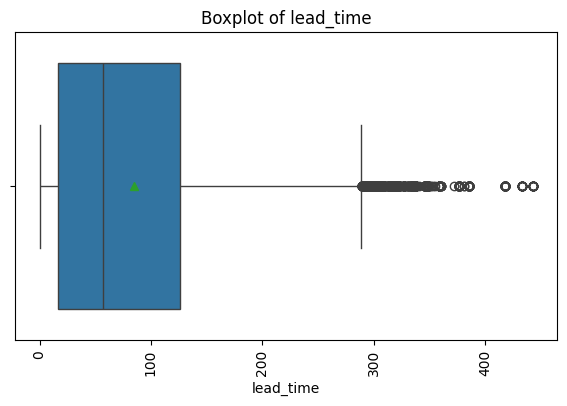

In [ ]:
#create boxplot and histogram for lead_time variable
plot_hist_bar('lead_time');

Continuous variable, but not a normal distribution - largely right skewed

Most common to book right before stay; longer in advance bookings are less frequent

Some outliers that booked super far in advance

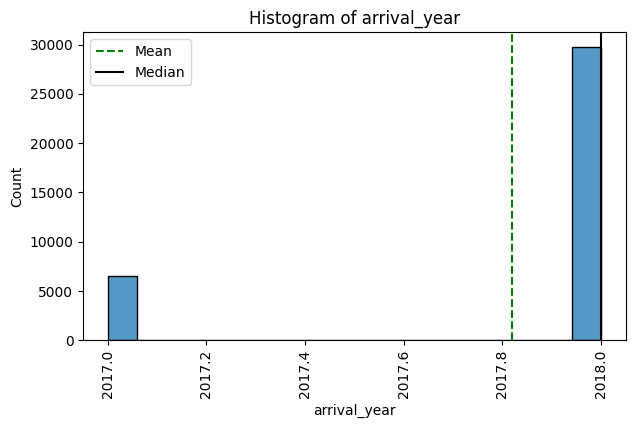

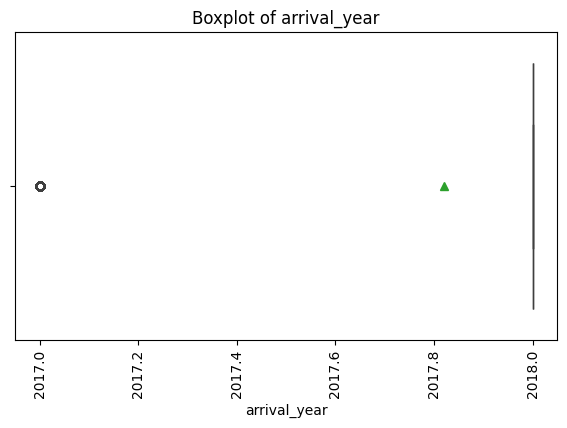

In [ ]:
#create boxplot and histogram for arrival_year variable
plot_hist_bar('arrival_year');

In [ ]:
#Check percentages of values from both years
data['arrival_year'].value_counts(normalize=True)

arrival_year
2018    0.820427
2017    0.179573
Name: proportion, dtype: float64

This data is mostly from 2018, with only about 18% of datapoints from 2017

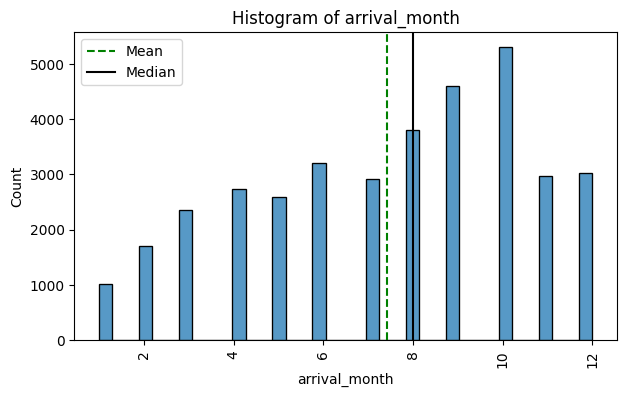

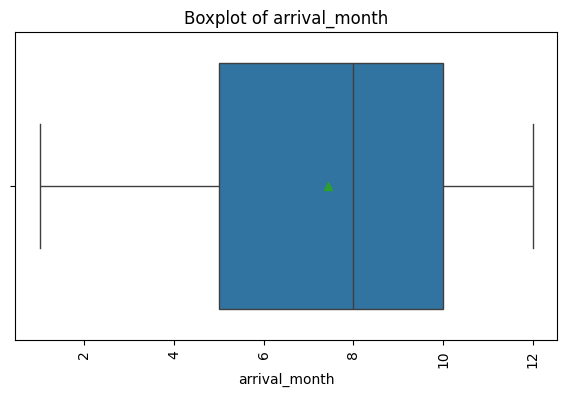

In [ ]:
#create boxplot and histogram for arrival_month variable
plot_hist_bar('arrival_month');

October seems to be the most common month for bookings

Seems to have a gradual growth of bookings throughout the year until October, then it begins to drop.

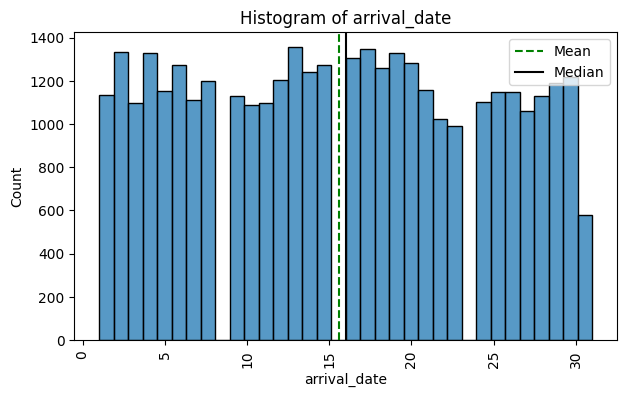

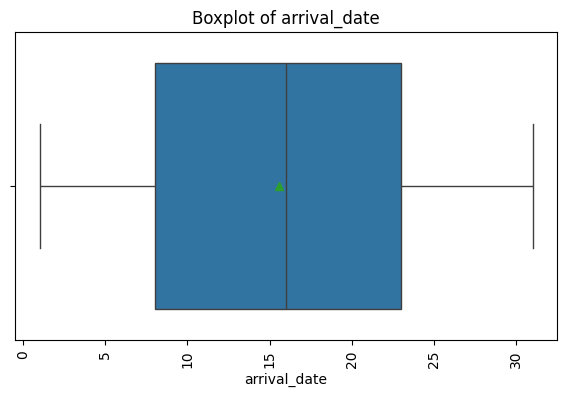

In [ ]:
#create boxplot and histogram for arrival_date variable
plot_hist_bar('arrival_date');

This is a pretty uniform distibution, which is what we would expect - not much of a pattern depending on the day of the month.

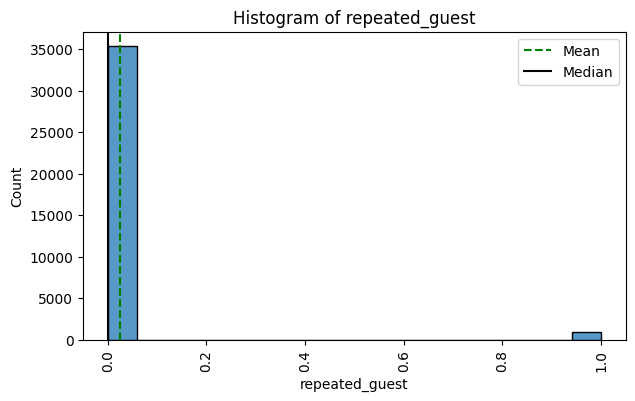

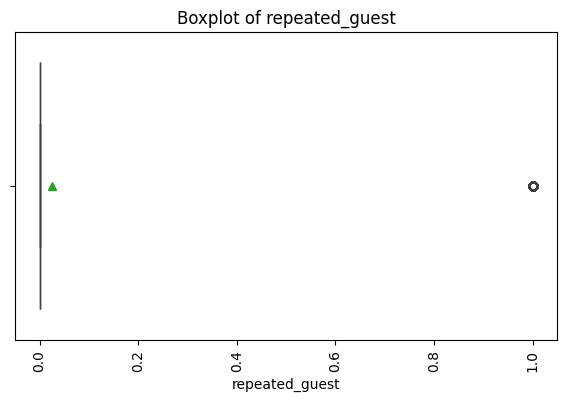

In [ ]:
#create boxplot and histogram for repeated_guest variable
plot_hist_bar('repeated_guest');

In [ ]:
#check percentages of each value in reated guest
data['repeated_guest'].value_counts(normalize=True)

repeated_guest
0    0.974363
1    0.025637
Name: proportion, dtype: float64

0 - Not repeated guest

1 - Repeated guest

Mostly not repeat guests, with only 2% of bookings from repeat guests

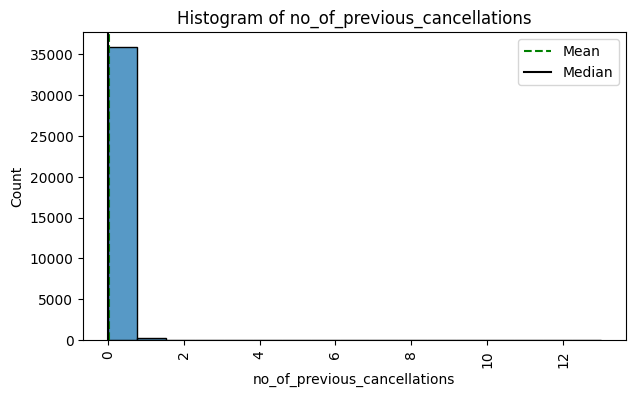

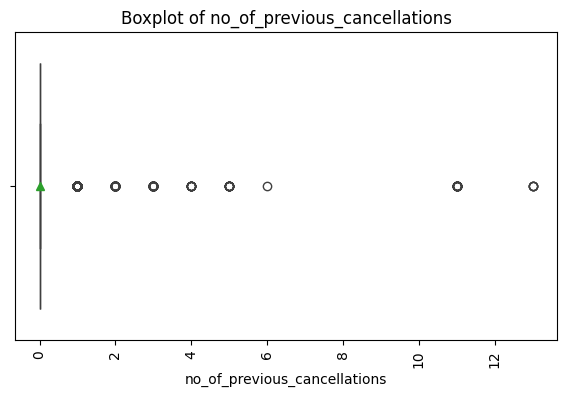

In [ ]:
#create boxplot and histogram for no_of_previous_cancellations variable
plot_hist_bar('no_of_previous_cancellations');

In [ ]:
#Check mode to see most common num of cancellations prior to booking
data['no_of_previous_cancellations'].mode()

0    0
Name: no_of_previous_cancellations, dtype: int64

Usually, guests had 0 cancellations prior to booking

However, there are some putliers with over 12 cancellations

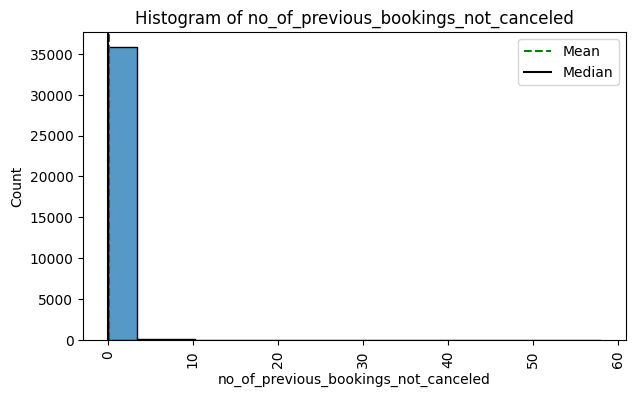

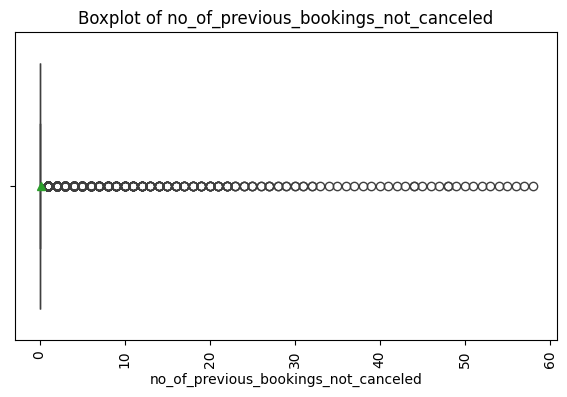

In [ ]:
#create boxplot and histogram for no_of_previous_bookings_not_canceled variable
plot_hist_bar('no_of_previous_bookings_not_canceled');

In [ ]:
#Check mode to see most common num of bookings not cancelled prior to booking
data['no_of_previous_bookings_not_canceled'].mode()

0    0
Name: no_of_previous_bookings_not_canceled, dtype: int64

Most people also had 0 num of bookings not cancelled prior to this booking, so this may have been many of these customers first time booking a hotel

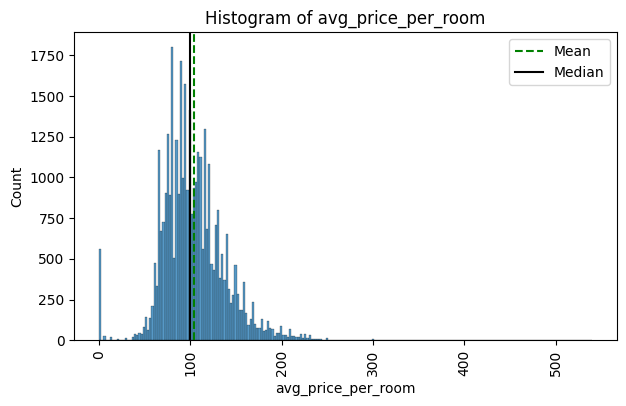

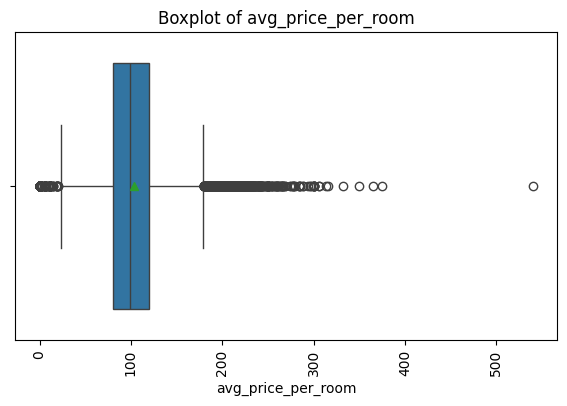

In [ ]:
#create boxplot and histogram for avg_price_per_room variable
plot_hist_bar('avg_price_per_room');

We see a normal distribution which is good because price is a continuous variable, and we would expect to see a normal distribution for this variable.

We also see many outliers, which is also expected

Median and mean seem to be around 100 dollars.

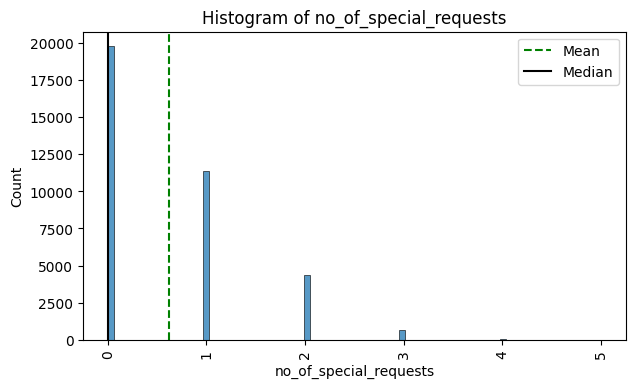

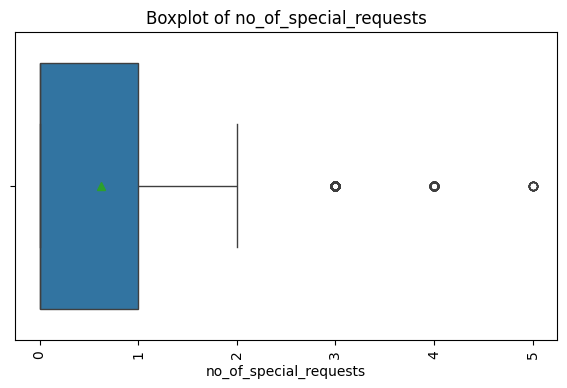

In [ ]:
#create boxplot and histogram for avg_price_per_room variable
plot_hist_bar('no_of_special_requests');

In [ ]:
#Check mode
data['no_of_special_requests'].mode()

0    0
Name: no_of_special_requests, dtype: int64

Most people had 0 special requests, but a few outliers with as many as 5 special requests

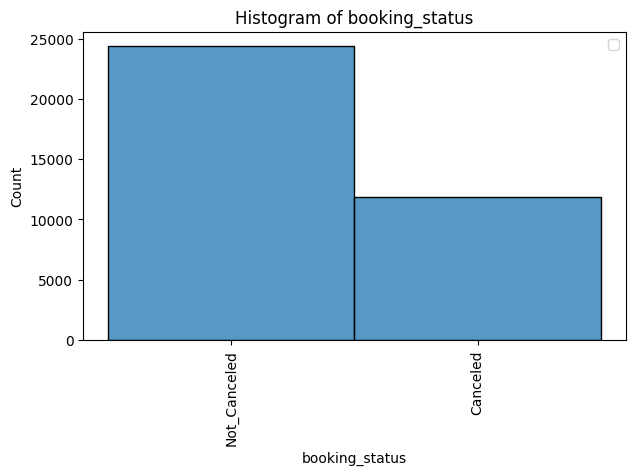

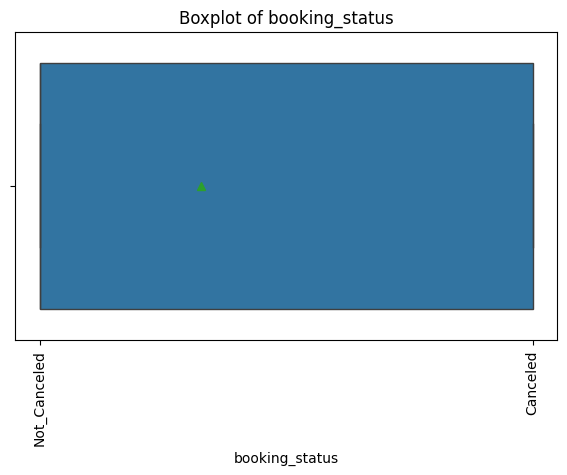

In [ ]:
#create boxplot and histogram for booking_status variable
plot_hist_bar('booking_status');

In [ ]:
#check percentage of each value
data['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

Most people did not cancel, but about 1/3 of bookings were cancelled

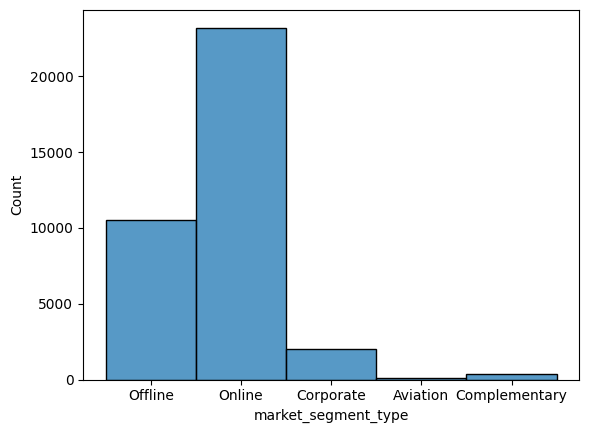

In [ ]:
#create histogram for market_segment_type variable
sns.histplot(data=data, x='market_segment_type')
plt.show()

In [ ]:
#check percentage
data['market_segment_type'].value_counts(normalize=True)

market_segment_type
Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: proportion, dtype: float64

- About 0.3% were market segment type aviation
- About 1% were market segment type complementary
- About 0.5% of data was from market segment type Corporate
- About 30% of data comes from market segment type Offline - a good amount of the data
- About 64% of data belongs to Online market segment group - this is the majority of the data.

### Bivariate Data Analysis

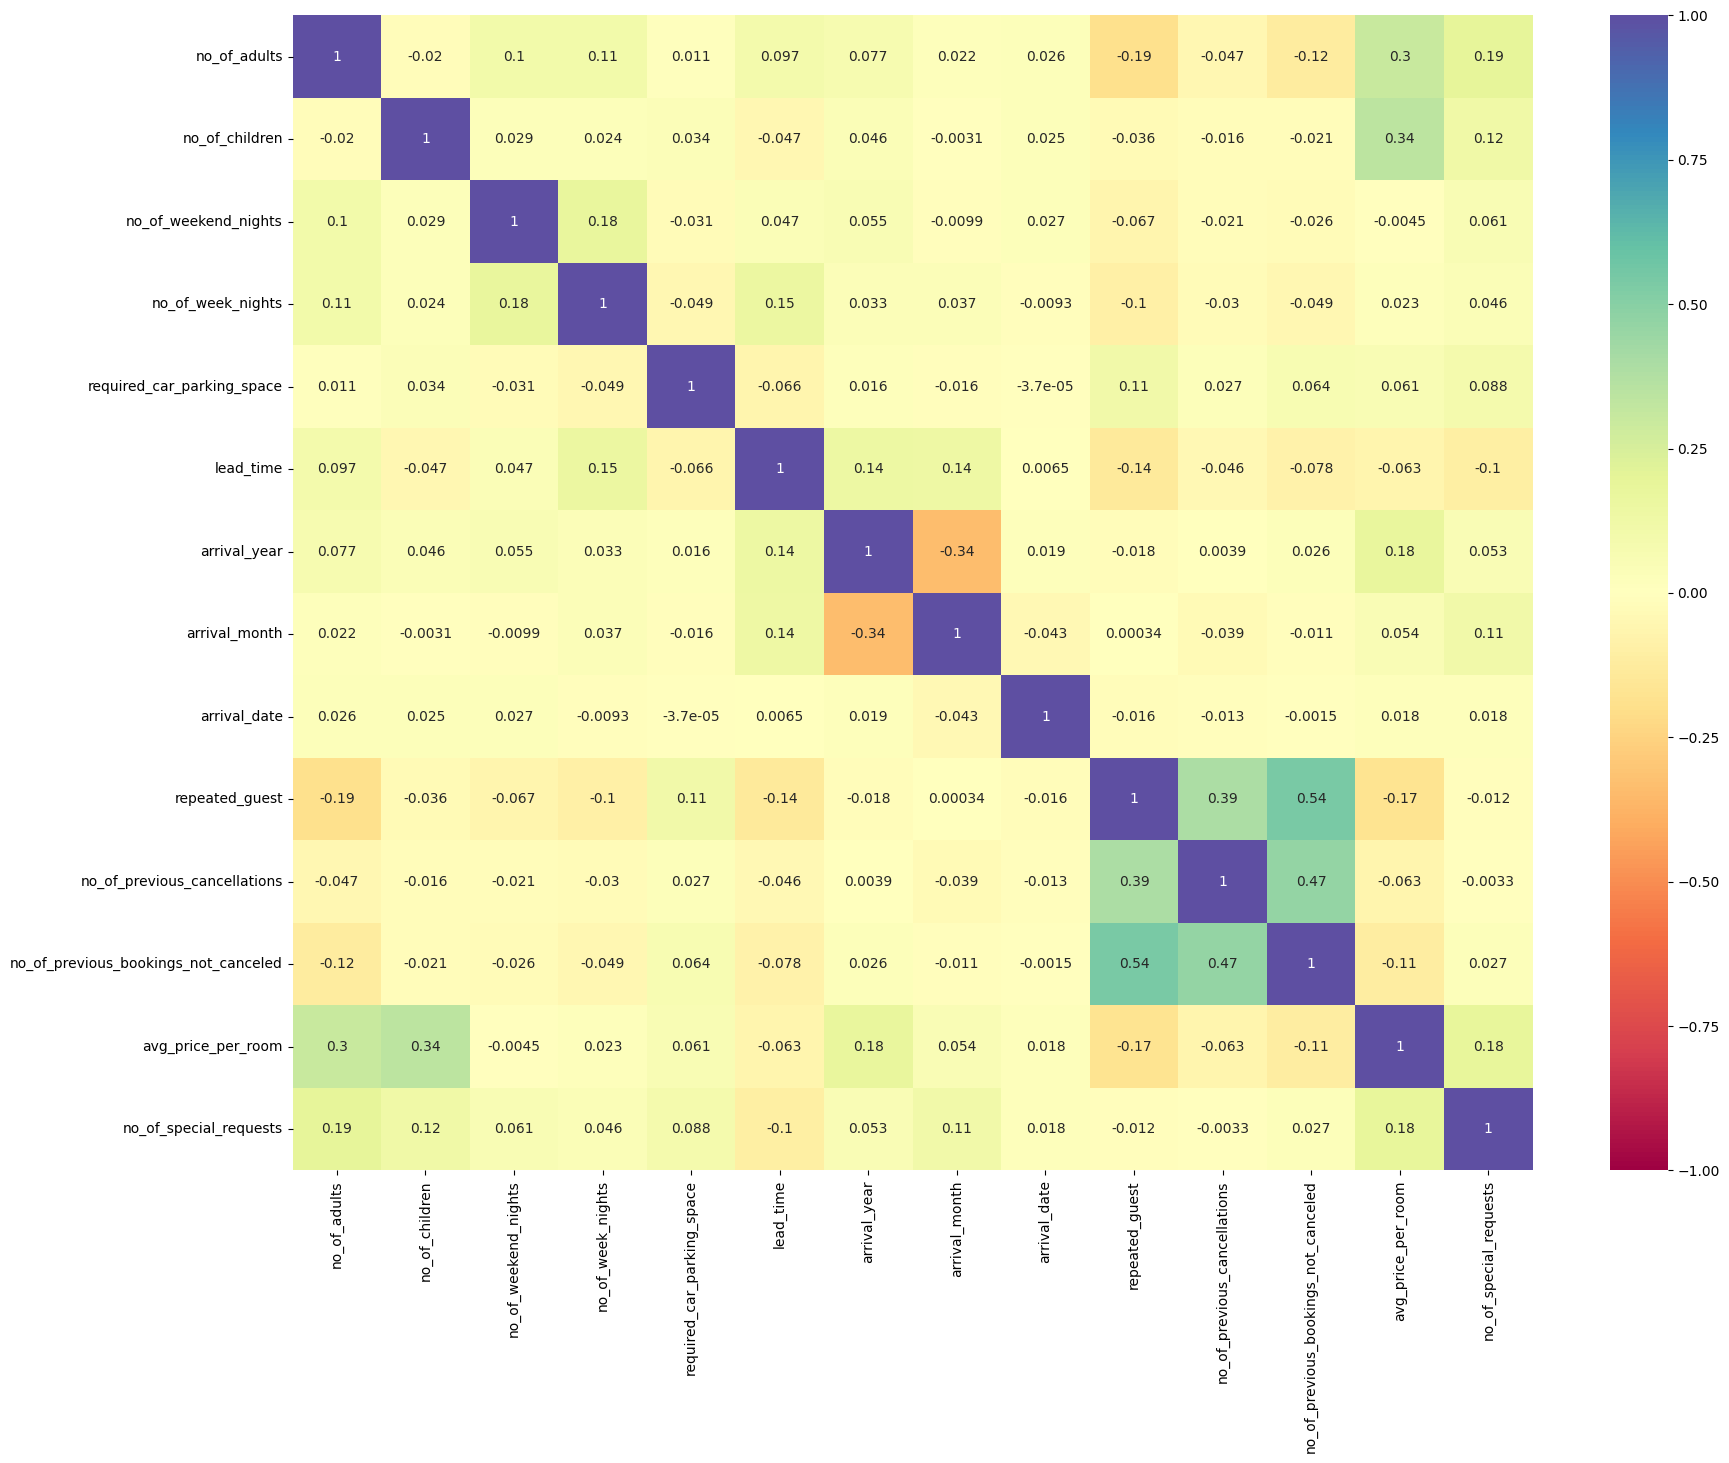

In [ ]:
#create correlations heatmap for all the numerical variables

#create var with list of all num vars
num_vars = data.select_dtypes(include=np.number).columns.tolist()

#create heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(data[num_vars].corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

Most variables do not seem to have much of a correlation with eachother right now.

However, repeat customers and number of bookings not cancelled have a moderate correlation.

Numerical vs Numerical variables:

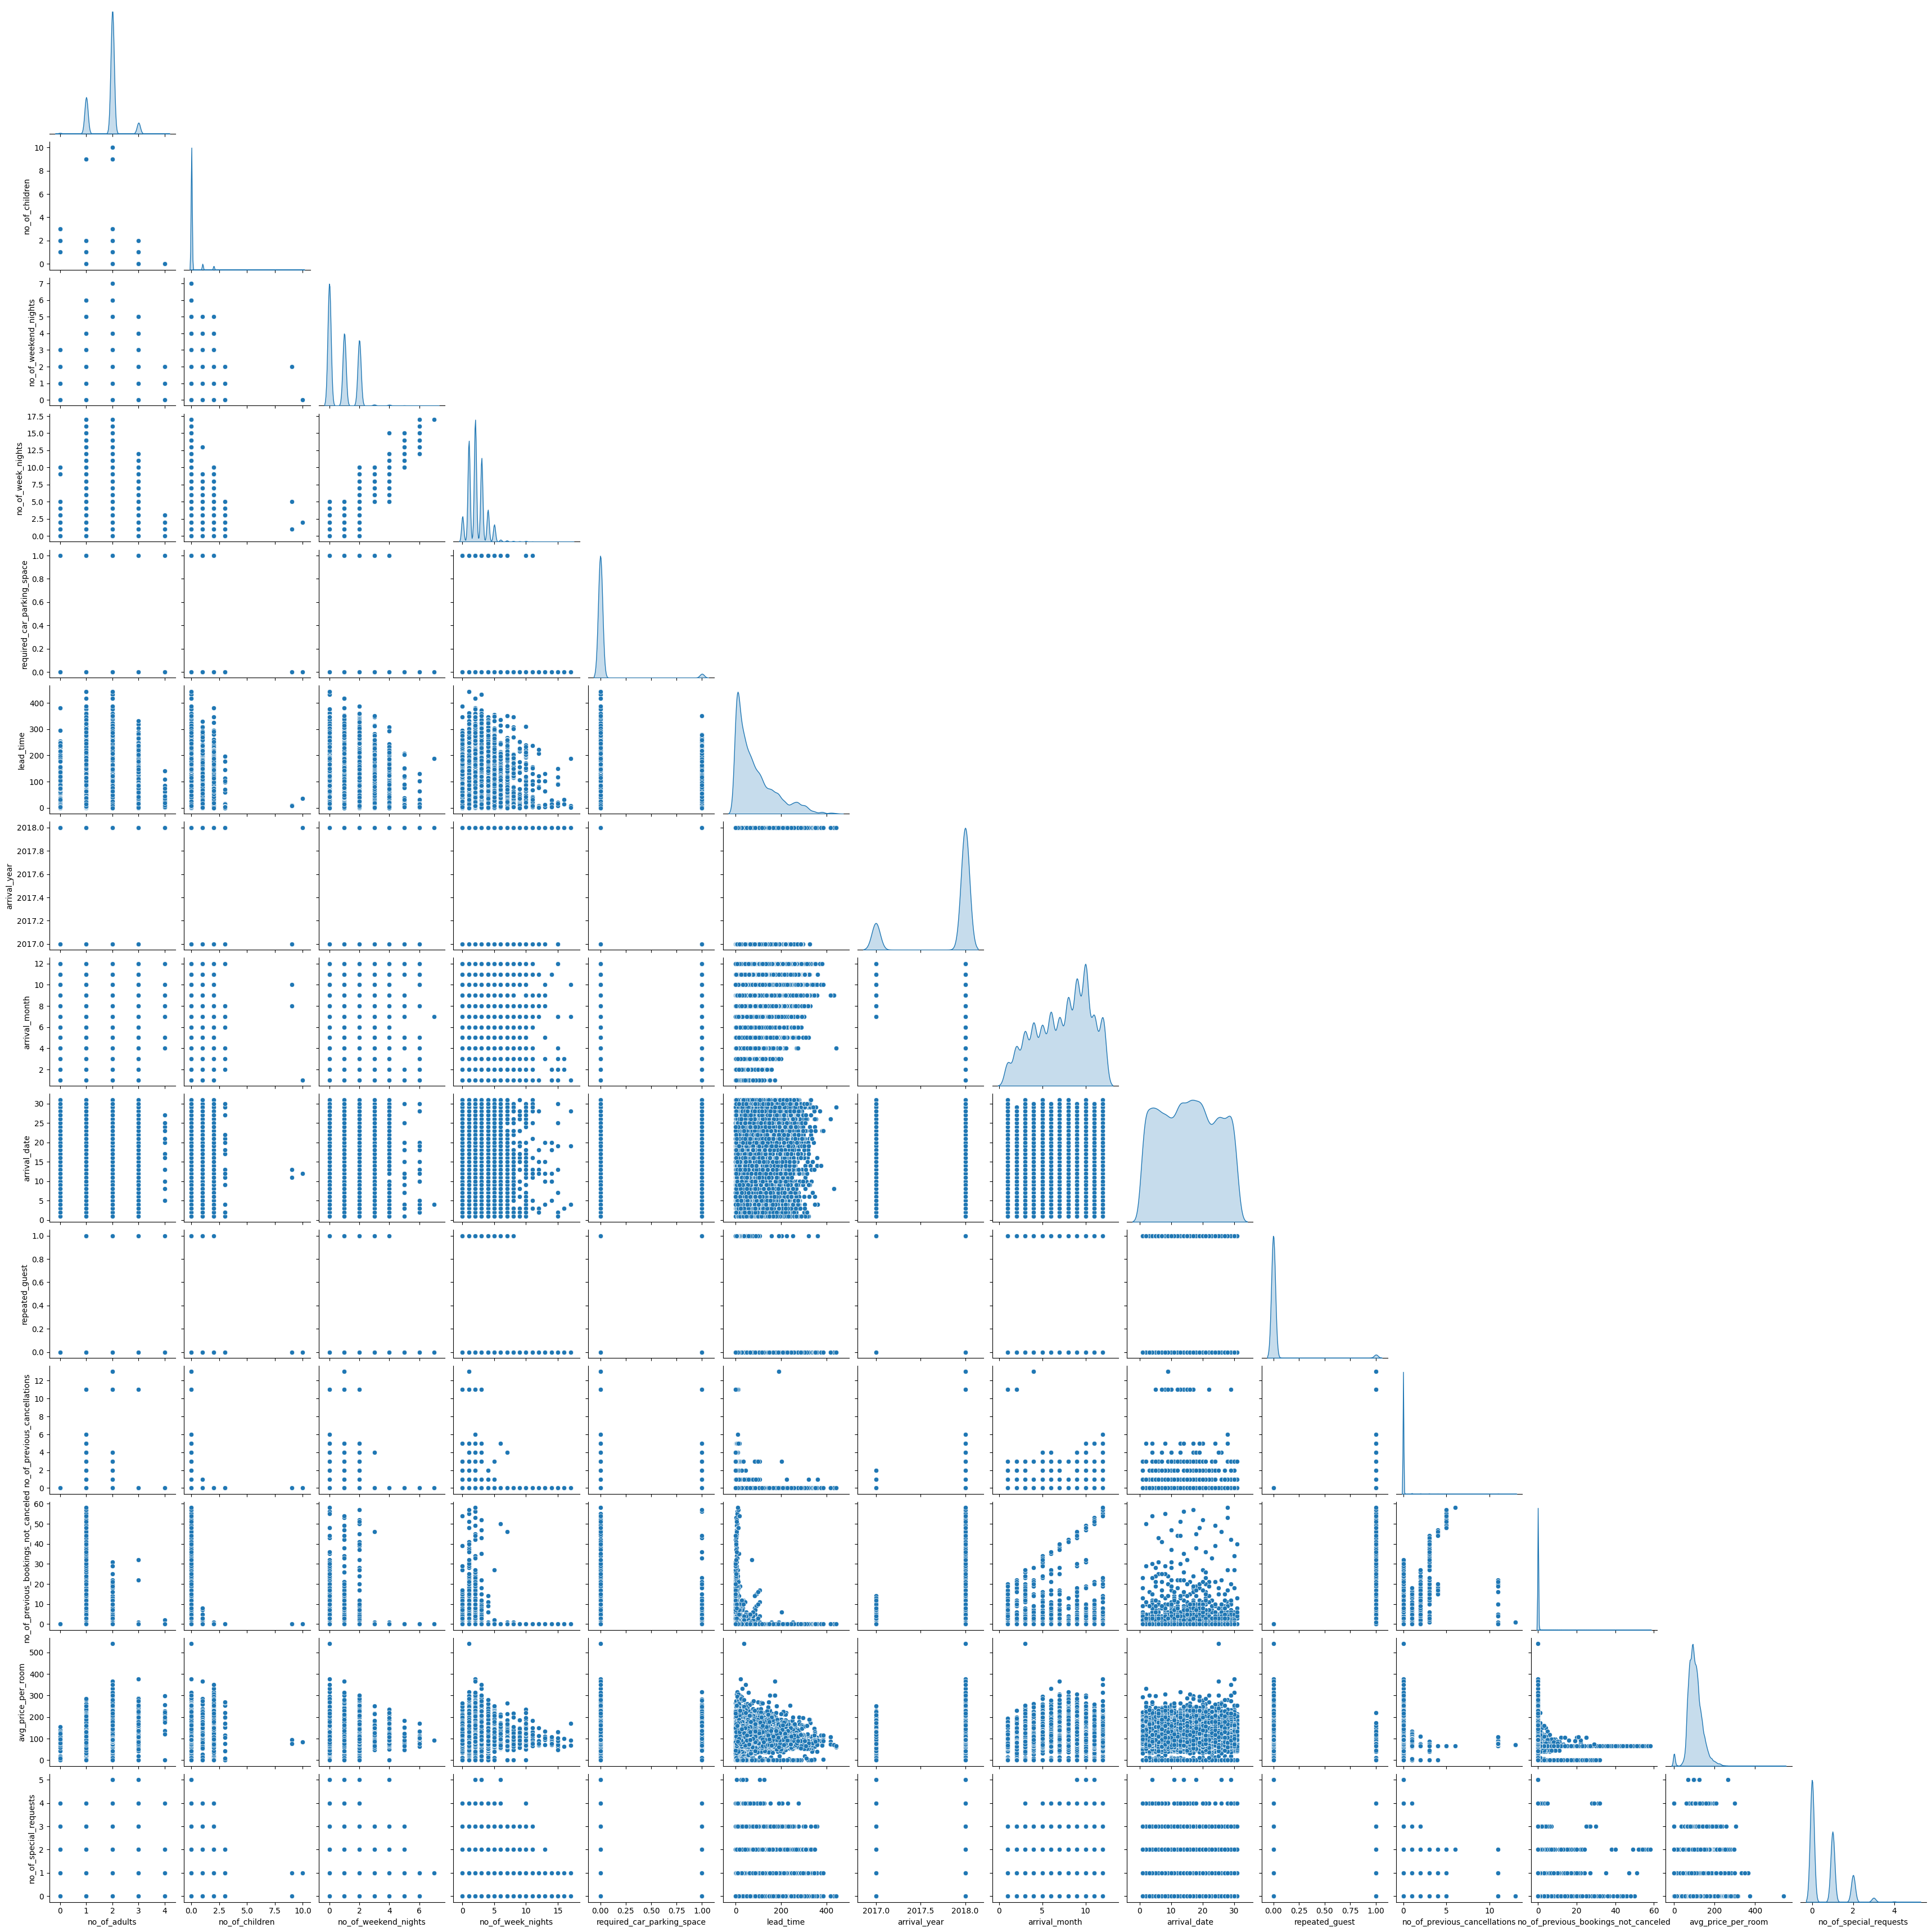

In [ ]:
#create pairplot for all the numeric variables
sns.pairplot(data[num_vars], diag_kind='kde', corner=True)

Observations from pairplot:

- The most expensive bookings tend to be made by groups with 2 adults
- Bookings with 1 adult tend to have the highest number of previous bookings not canceled
- Bookings with 1 or 2 adults tend to be made the furthest in advance
- Bookings with less children tended to be more expensive
- Bookings made with less children tended to have higher number of previous bookings not cancelled
- Bookings made far in advance tend to have less number of bookings not cancelled
- Bookings made further in advance had less special requests
-There is a slight trend between lead time and price; as lead time increases price decreases (vice versa) - Bookings made further in advance are probably cheaper
- Bookings made on short notice tended to have more previous cancellations
- From the arrival year and arrival month graph, we can see that the data begin from around July 2017, and went throughout December 2018.
- More special requests made later in year (could just be due to more bookings later in year)
- As the months increased, there were more number of previous bookings not cancelled (maybe since the data was only for 2 years, the longer in the year, the more data they had, so the higher the number of previous cancellations there were?)
- Repeated guest associated with higher number of bookings not cancelled
- Not repeat guests tended to get higher priced rooms (maybe people who had stayed there before know better room deals)

Numerical vs Categorical variables:

In [ ]:
#function to create boxplots between one categorical variable and all the numerical variables

def create_boxplots(data, cat_var):
  num_plots = len(num_vars)

  #create subplots
  fig, axes = plt.subplots(3, 6, figsize=(20, 10))
  axes = axes.flatten()

  #loop through numerical columns and create box plots
  for i, n in enumerate(num_vars):
    sns.boxplot(x=cat_var, y=n, data=data, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel(n)

  #remove any empty subplots
  for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

  #adjust the spacing between plots
  plt.subplots_adjust(left=0.3, right=0.99, top=0.99, bottom=0.3, wspace=0.7, hspace=0.6)

  plt.tight_layout()
  plt.show()

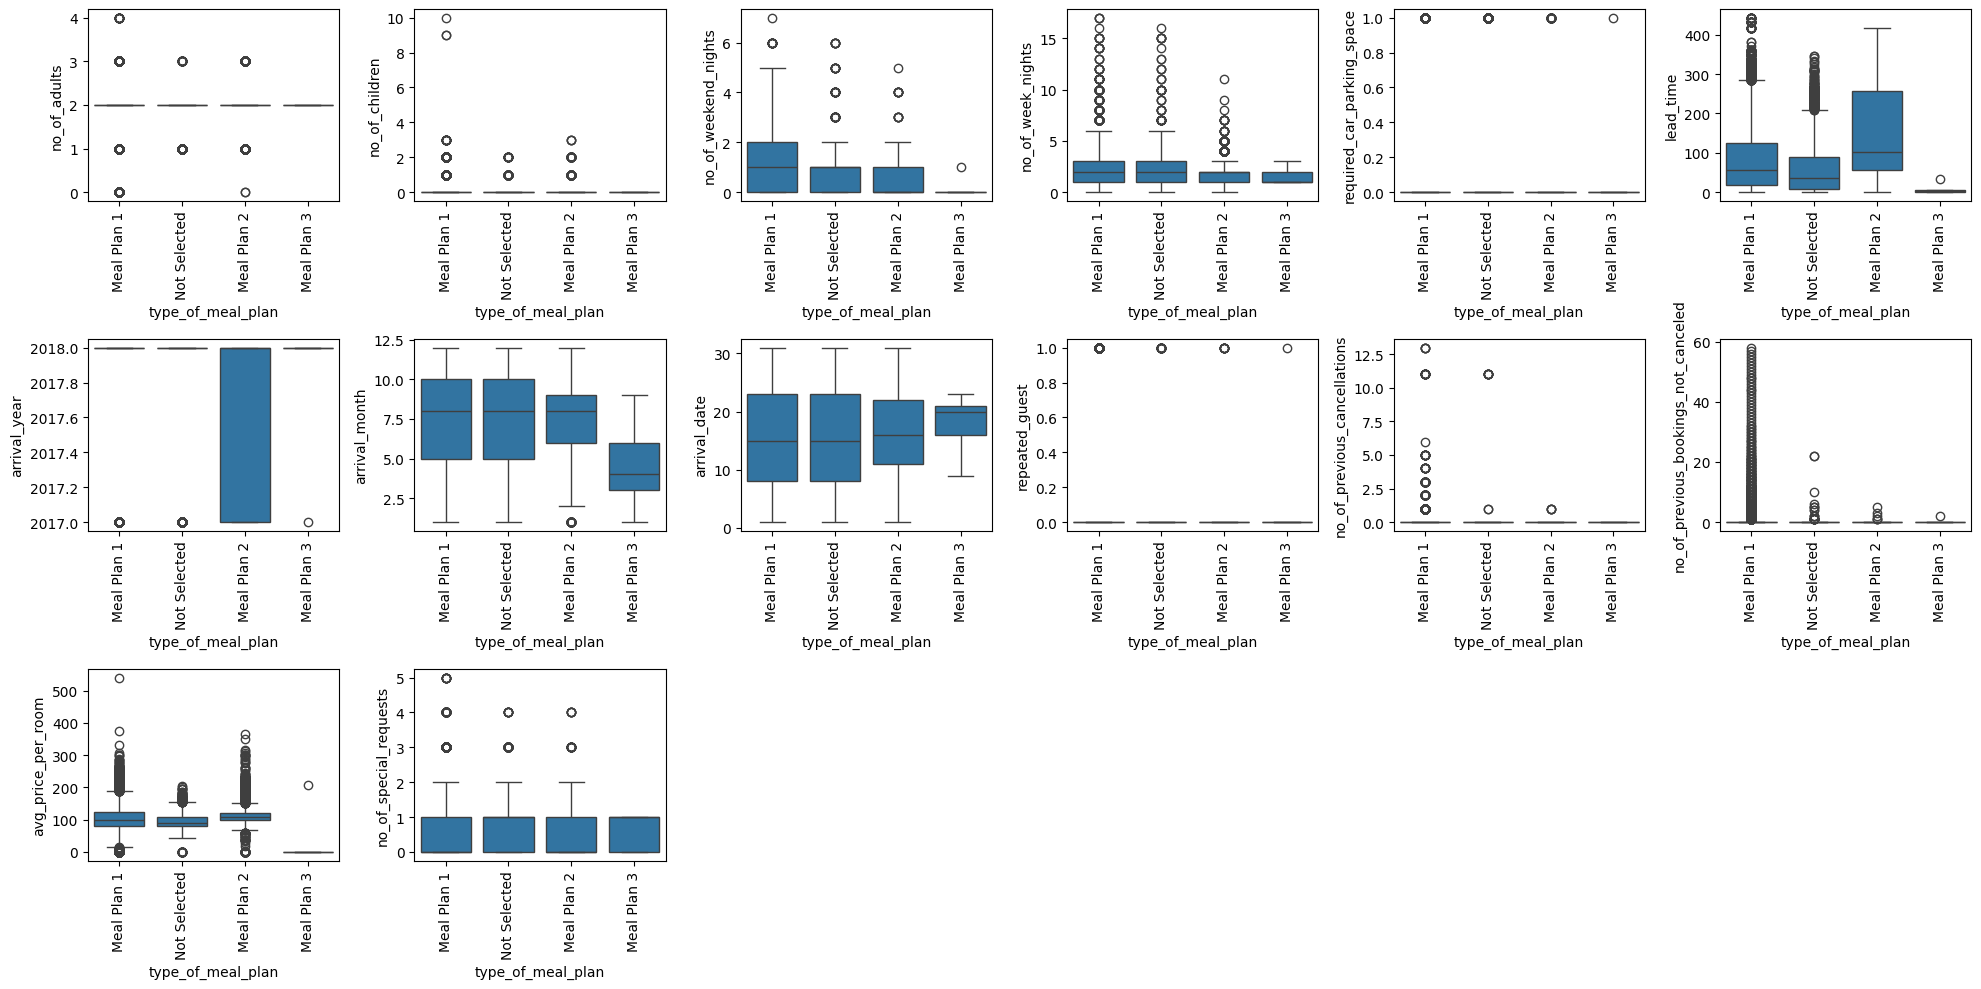

In [ ]:
#create boxplots for type of meal plan and each numerical variable
create_boxplots(data, 'type_of_meal_plan');

Trends identified by meal plan:

(0 - No selected meal plan

1 – Breakfast

2 – Half board (breakfast and one other meal)

3 – Full board (breakfast, lunch, and dinner))

- Some people with meal plan 1 had up to 4 adults, and up to 10 children, indicating it is probably a better plan for more people
- Bookings made for weekends had the most meal 1 plans
- Meal plan 1 and no meal plan had the most number of week nights booked
- People who booked further in advance tended to get meal plan 2
- There seem to be no bookings with meal plan 3 after September
- Meal plan 2 might be associated with a higher priced room (maybe meal plan 2 is more expensive)

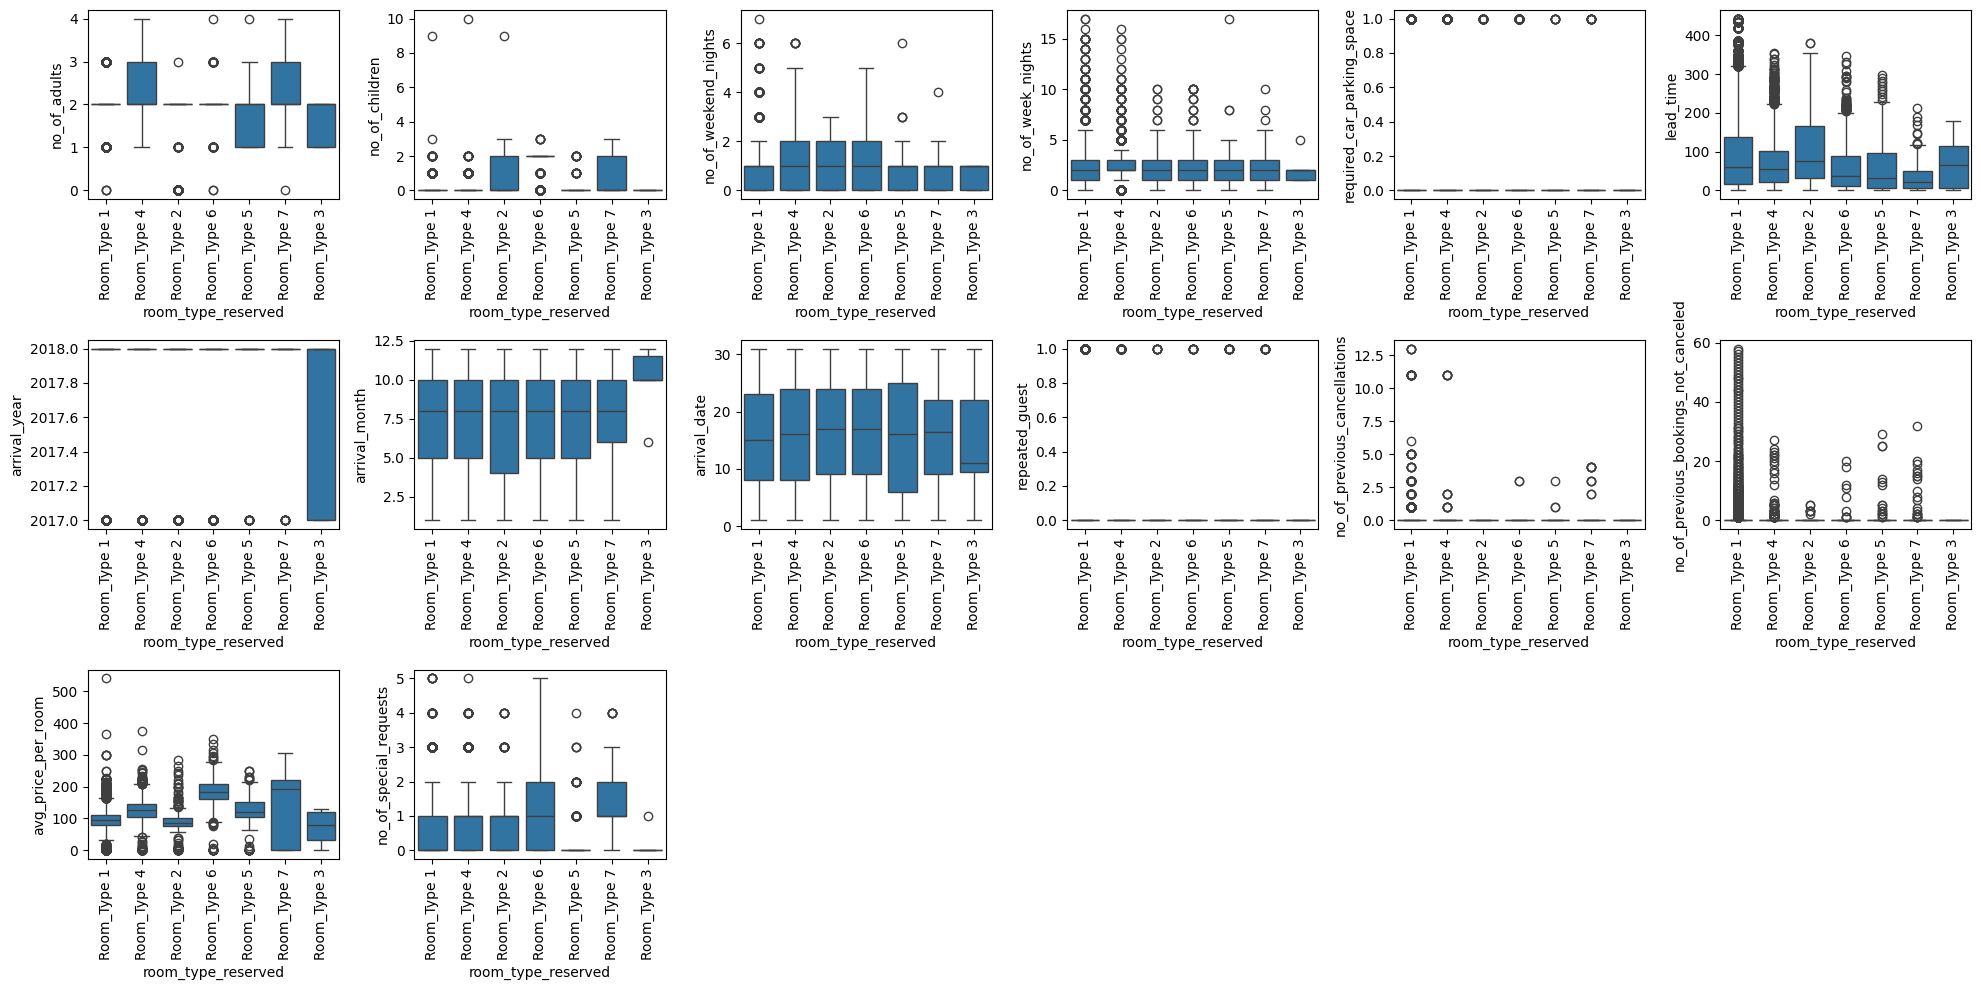

In [ ]:
#create boxplots for type of room and each numerical variable
create_boxplots(data, 'room_type_reserved');

Trends identified by room type:
- Room type 4 and 7 tended to have more adults
- Room type 2 and 7 tended to have more kids
- Room type 4 and 6 tended to be more popular on weekends
- Room type 3 seems to be the least popular overall, but gets more bookings later in the year (probably because they get more bookings, so customers have less options)
- Room type 2 seems to be associated with the highest lead time (maybe most desireable option)
- Room type 3 seemed to be just as unpopular in 2017
- Room type 7 seems to be associated with more expensive rooms (most expensive room type); but, it also has a large range with inexpensive options as well
- People in room type 6 had the most special requests

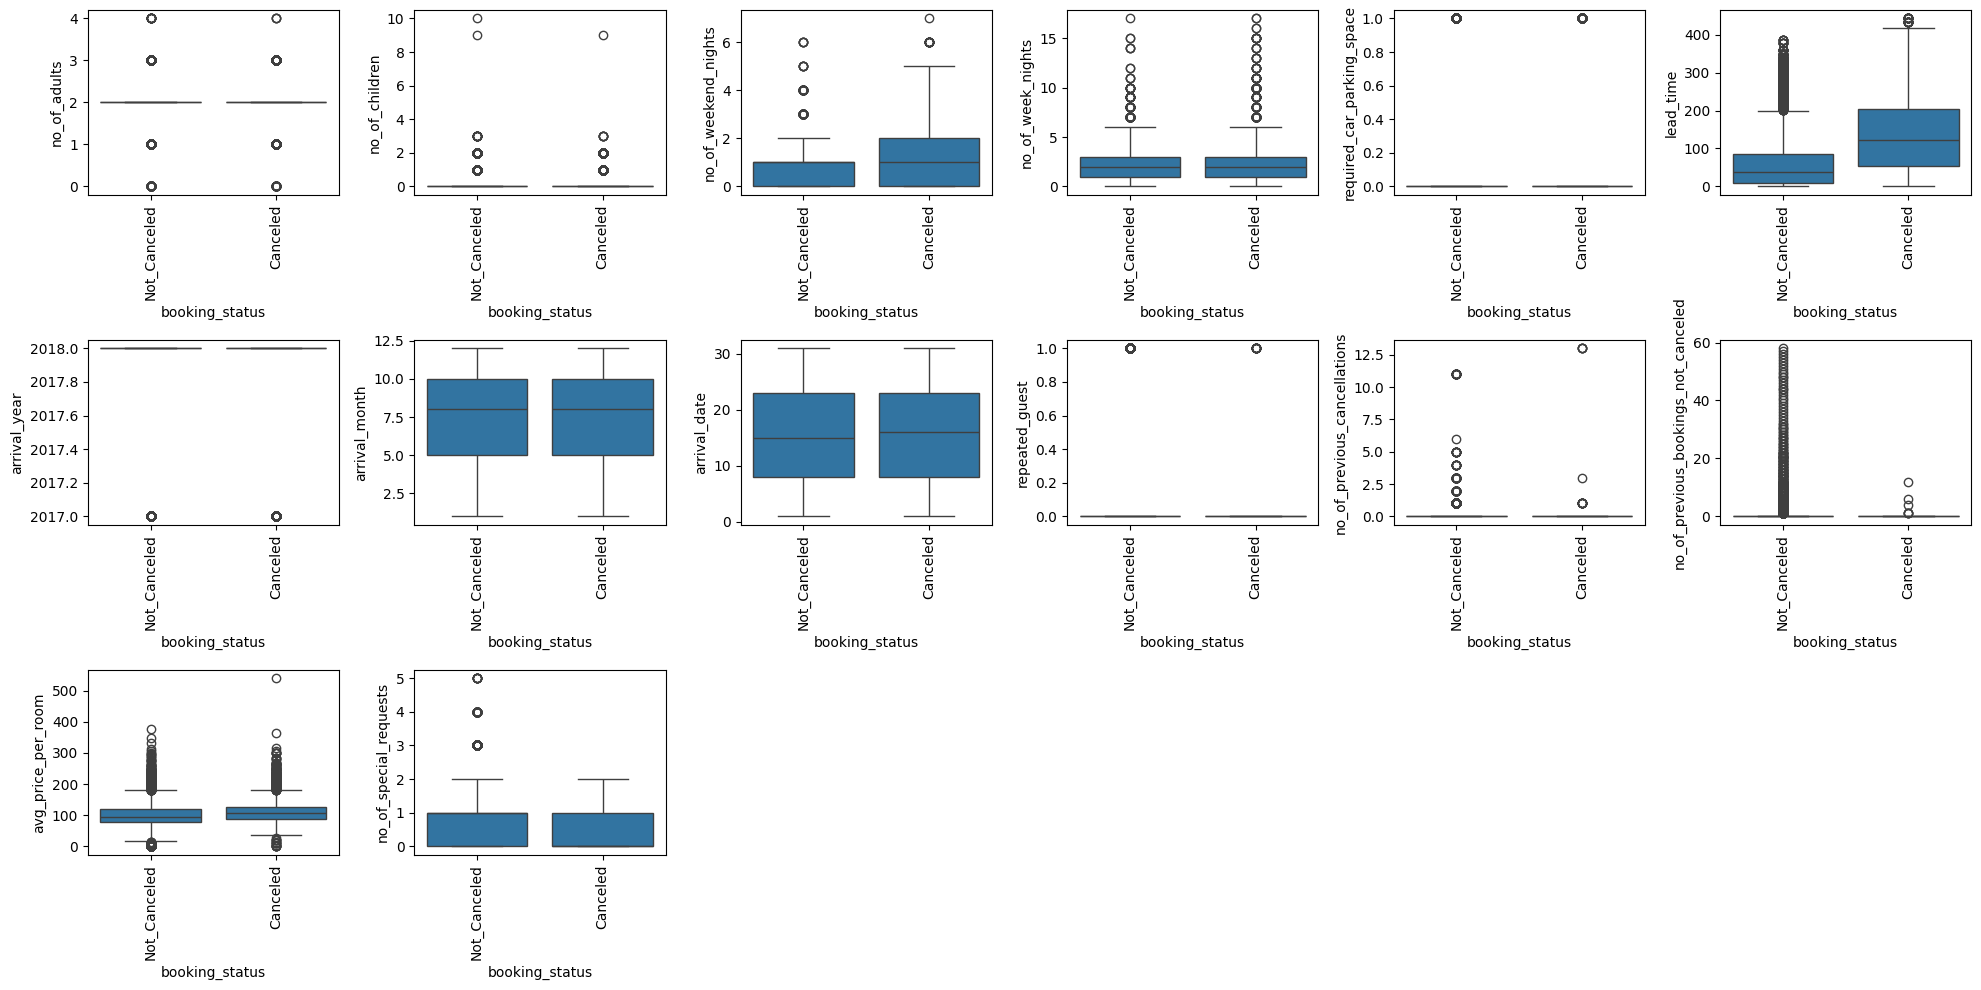

In [ ]:
#create boxplots for type of booking status and each numerical variable
create_boxplots(data, 'booking_status');

Trends identified by booking status:

(Not Canceled - 0

Canceled - 1 )

- People more likely to cancel for bookings on weekend nights
- Canceled bookings more likley to be made further in advance
- Not canceled bookings had many instances of not cancelling in the past

### Answering Questions:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

What are the busiest months in the hotel?

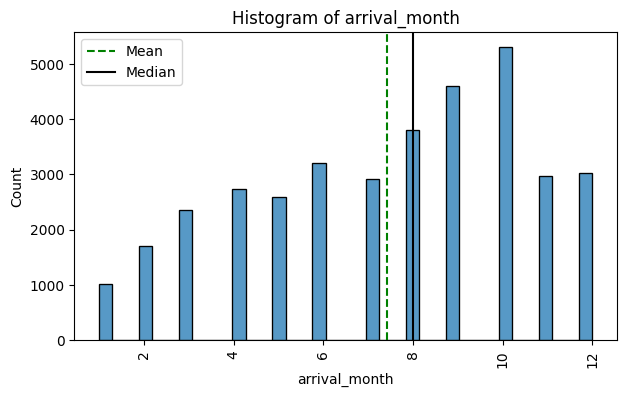

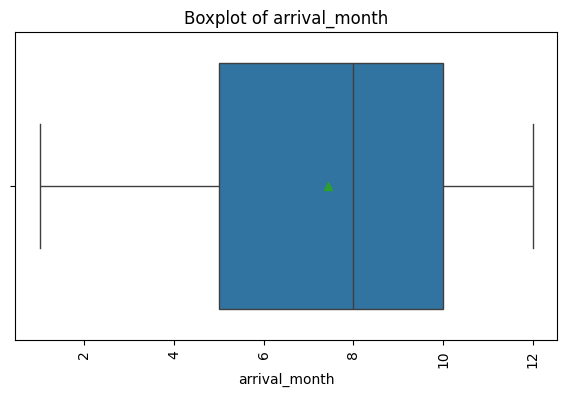

In [ ]:
#create boxplot and histogram for arrival_month variable
plot_hist_bar('arrival_month');

October seems to be the most common month for bookings

Seems to have a gradual growth of bookings throughout the year until October, then it begins to drop.

September and August are the other busiest months.

January gets the smallest amount of business, followed by February.  

Which market segment do most of the guests come from?

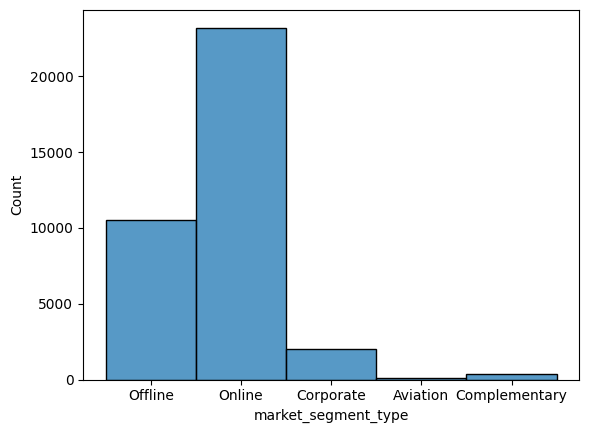

In [ ]:
sns.histplot(data=data, x='market_segment_type')
plt.show()

In [ ]:
print(data['market_segment_type'].value_counts(normalize=True))

market_segment_type
Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: proportion, dtype: float64


The most guests come from the online market segment, which entails about 64% of the data.

Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

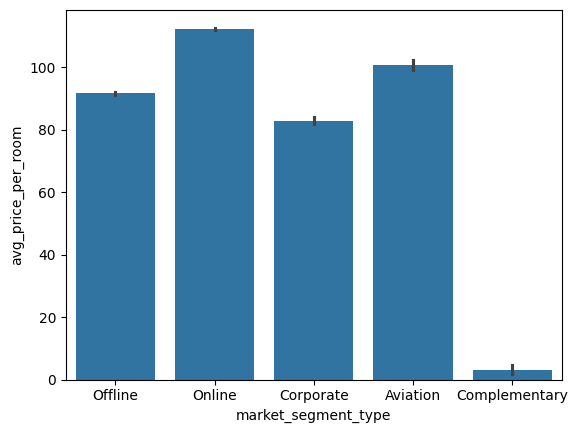

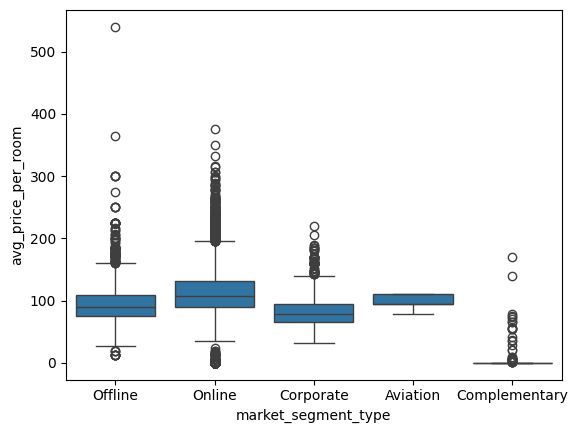

In [ ]:
#create barplot to show mean price for each market segment type
sns.barplot(data=data, x='market_segment_type', y='avg_price_per_room')
plt.show()

#create barplot to show mean, median, range, and outliers of price for each market segment type
sns.boxplot(data=data, x='market_segment_type', y='avg_price_per_room')
plt.show()

- In the offline market segment, they seemed to pay a pretty standard average price per room
- Online typically paid a bit more per room
- Corporate typically paid a bit less, but there are no ouliers on the lower end, so they probably have a set minimum they can pay
- Aviation seems to have a pretty strict minimum and maximum they are able to pay, because athough their average is pretty normal, they have a very small range with no outliers
- Complementary pays the lowest on average by far; although they do have outliers, but the highest outlier is only at about $200 (inexpensive compared to the others)

What percentage of bookings are canceled?

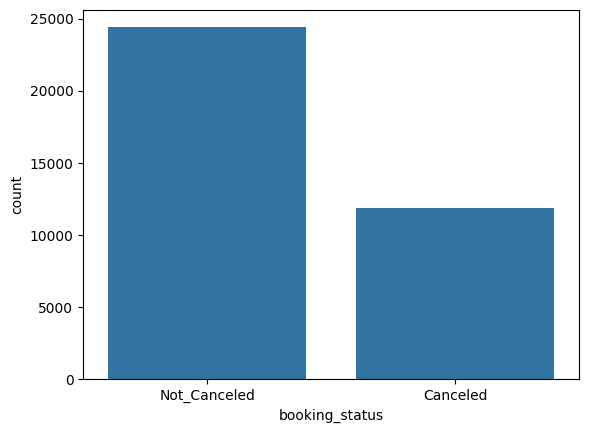

In [ ]:
#create countplot to visualize difference
sns.countplot(data=data, x='booking_status')
plt.show()

In [ ]:
#check actual percentages
data['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

The percentage of bookings cancelled waas 32.76% of all bookings. This is almost 1/3 of all the data.

Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

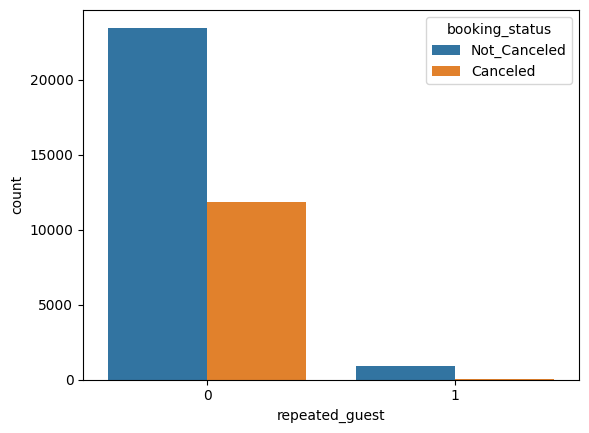

In [ ]:
#create countplot of repeated guests with hue of booking status to visualize difference
sns.countplot(data=data, hue='booking_status', x='repeated_guest')
plt.show()

In [ ]:
data[data['repeated_guest']==1]['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled    0.982796
Canceled        0.017204
Name: proportion, dtype: float64

Only 1.72% of the repeating guests cancelled

Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

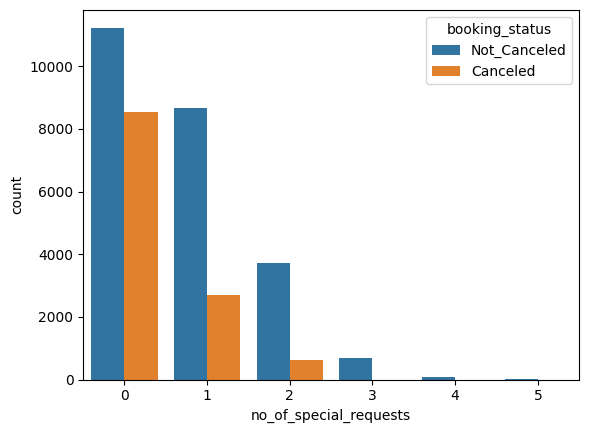

In [ ]:
#Create countplot between booking status and number of special requirements
sns.countplot(data=data, hue='booking_status', x='no_of_special_requests')
plt.show()

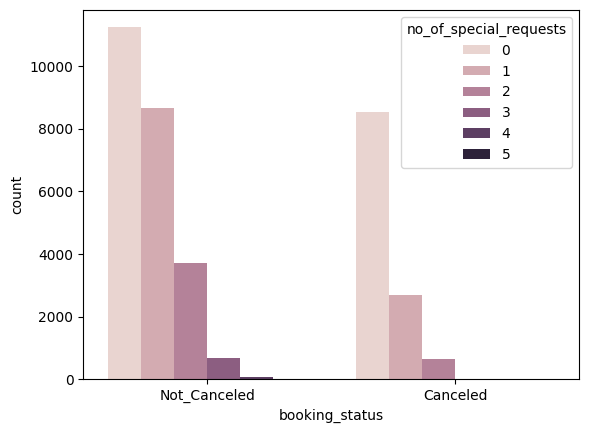

In [ ]:
#Different way of visualizing
sns.countplot(data=data, x='booking_status', hue='no_of_special_requests')
plt.show()

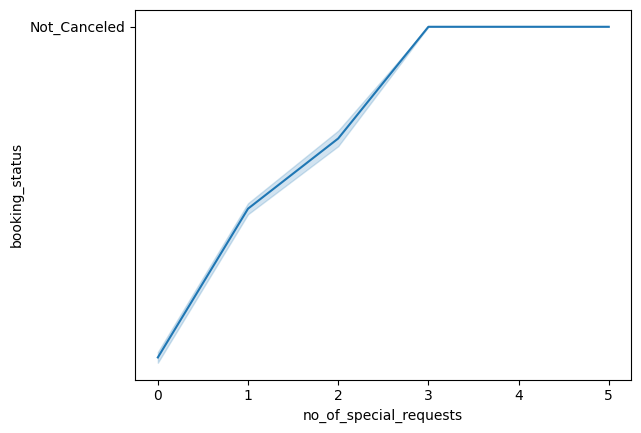

In [ ]:
sns.lineplot(data=data, y='booking_status', x='no_of_special_requests')
plt.show()

Special requirements do not seem to raise cancellation rate; if anything, as special requirements increased, cancellations decreased

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Missing value treatment (if needed)

In [ ]:
#check if any null values
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No null values, so we do not meed to worry about missing value treatment

Feature Engineering

In [ ]:
#convert object columns to categorical columns
for col in data.columns: #loop through all columns in the dataframe
    if data[col].dtype == 'object': #identify columns with strings
        data[col] = pd.Categorical(data[col])#replace strings with category
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

Object variables now converted to categorical vars

In [ ]:
#show each category amount for each categorical variable, except booking id bc those are also unique values
print(data['type_of_meal_plan'].value_counts())
print(data['room_type_reserved'].value_counts())
print(data['market_segment_type'].value_counts())
print(data['booking_status'].value_counts())

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


To make this more neat, I want to:

- change type of meal plan to just nums 1-3 for each type, then 0 for not selected
- change room type reserved to just nums 1-7
- use one hot encoding on market segment type
- change booking status to 0 for not cancelled, 1 for cancelled

Outlier detection and treatment (if needed)

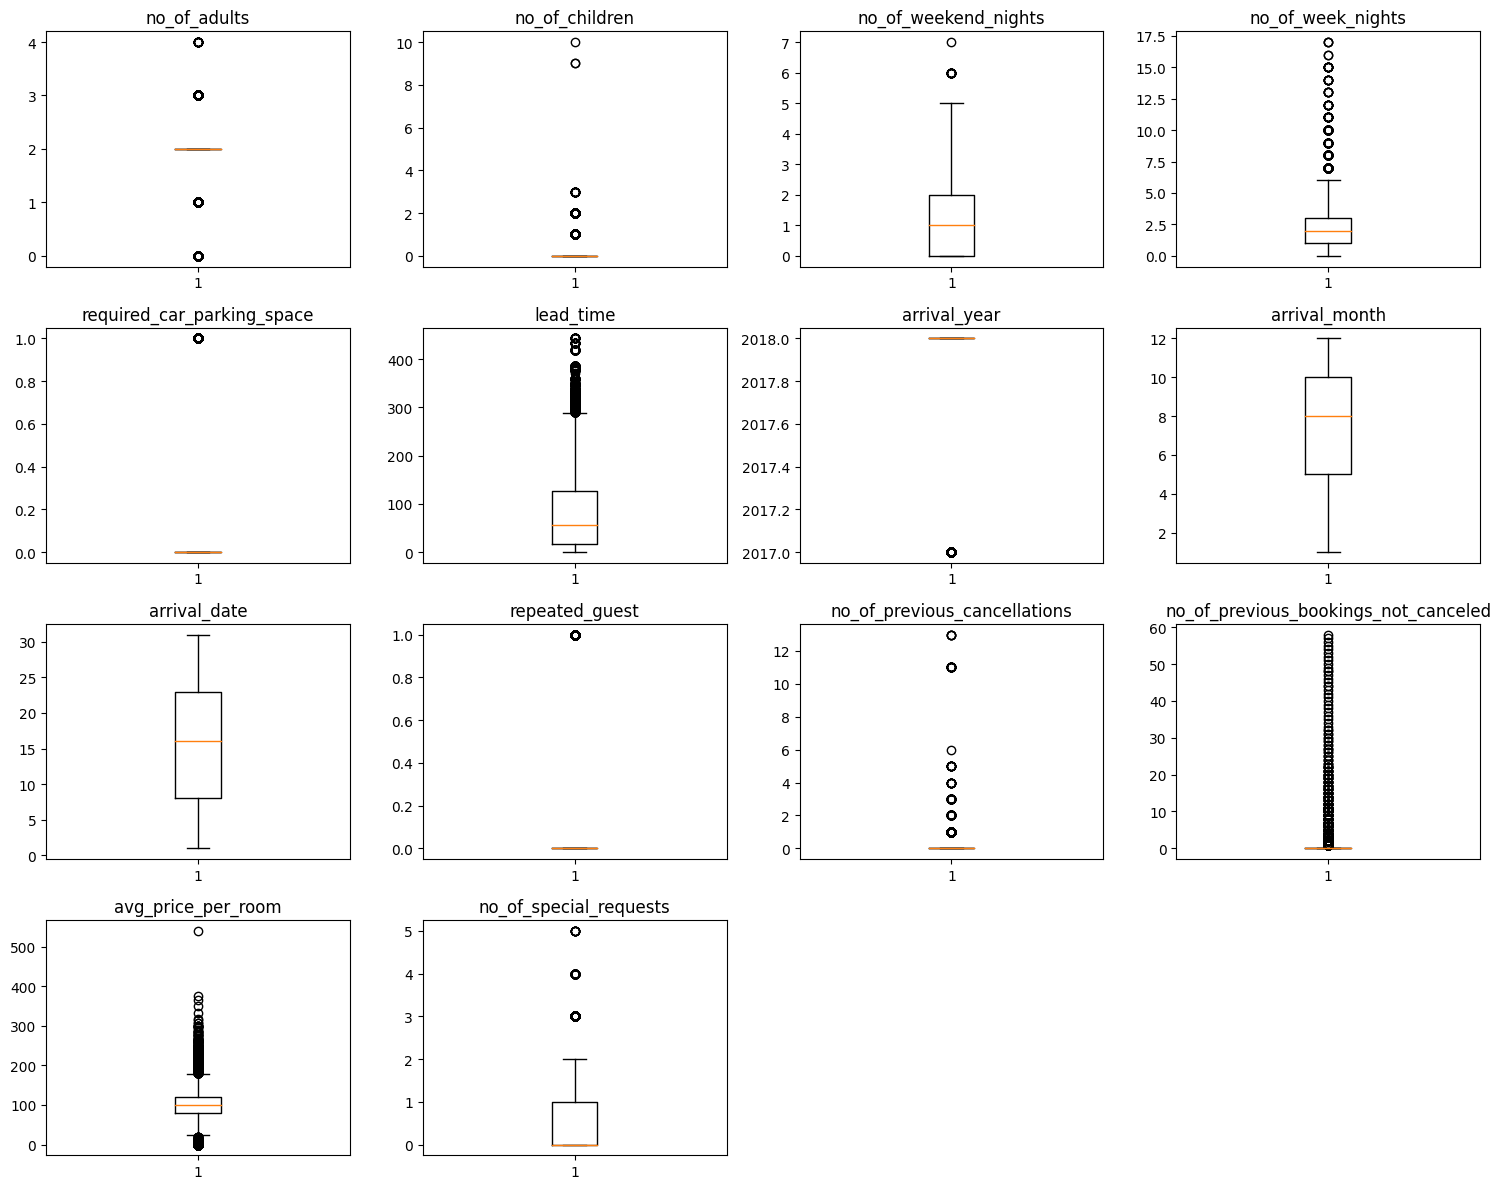

<Figure size 640x480 with 0 Axes>

In [ ]:
#outlier detection using boxplot

num_vars2 = data.select_dtypes(include=np.number).columns.tolist()

#leave out arrival_year bc it is a temporal variable
num_vars2.remove('arrival_year')

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_vars):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()
plt.savefig("outliers.png")

There are a number of outliers in this data, but in this context, all seem reasonable, and should not be removed since there are so many, so it would largely affect the analysis.

Preparing data for modeling

In [ ]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

In [ ]:
#create dictionary for new structure for each series in dataframe I want to change
new_structure = {"booking_status": {"Not_Canceled": 0, "Canceled": 1 }}

In [ ]:
data = data.replace(new_structure)
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0              0  
1                       1              0  
2                       0              1  
3                       0              1  
4                       0              1

## EDA

- It is a good idea to explore the data once again after manipulating it.

Re-answer these questions:
- What are the busiest months in the hotel?
- Which market segment do most of the guests come from?
- Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
- What percentage of bookings are canceled?
- Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
- Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

1. What are the busiest months in the hotel?

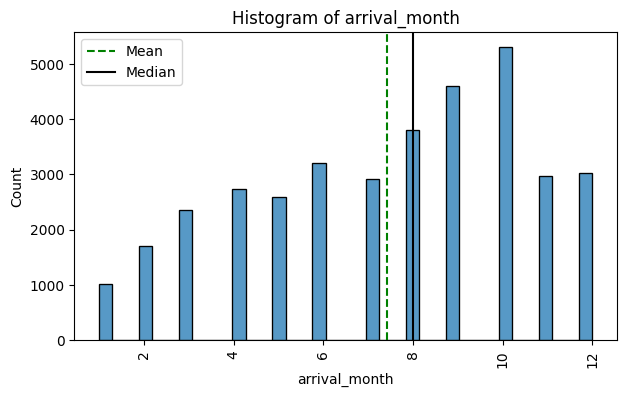

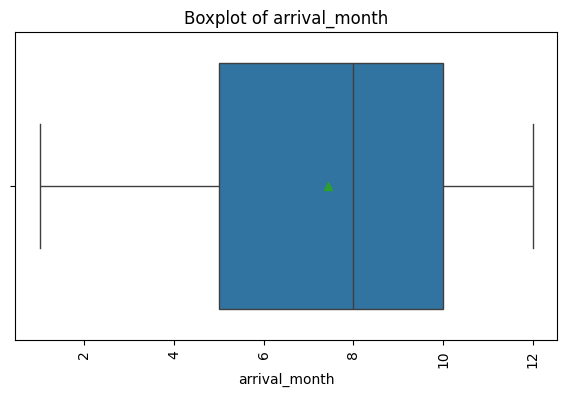

In [ ]:
#create boxplot and histogram for arrival_month variable
plot_hist_bar('arrival_month');

Graphs did not change.

October seems to be the most common month for bookings

Seems to have a gradual growth of bookings throughout the year until October, then it begins to drop.

Slight drop in July

September and August are the other busiest months.

January gets the smallest amount of business, followed by February.

2. Which market segment do most of the guests come from?

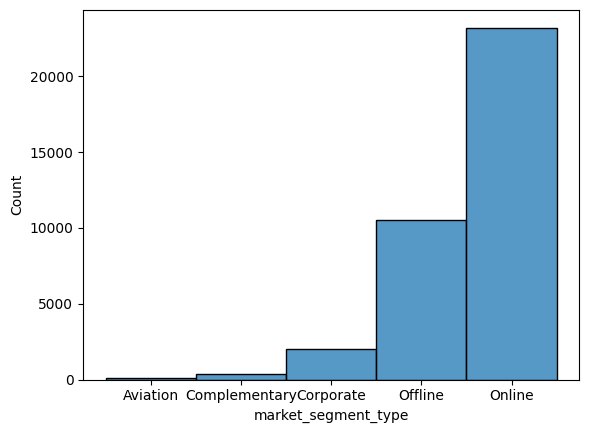

In [ ]:
sns.histplot(data=data, x='market_segment_type')
plt.show()

In [ ]:
print(data['market_segment_type'].value_counts(normalize=True))

market_segment_type
Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: proportion, dtype: float64


Still the same.

The most guests come from the online market segment, which entails about 64% of the data.

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

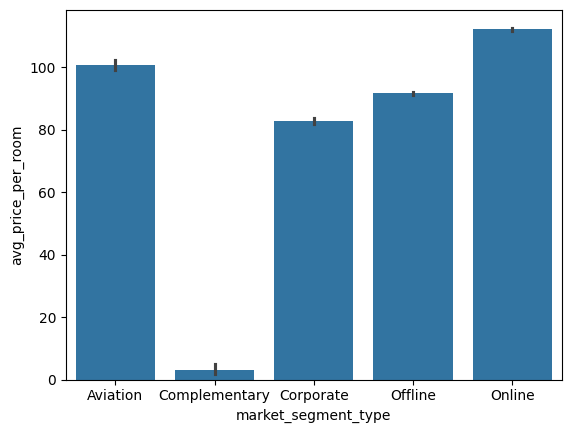

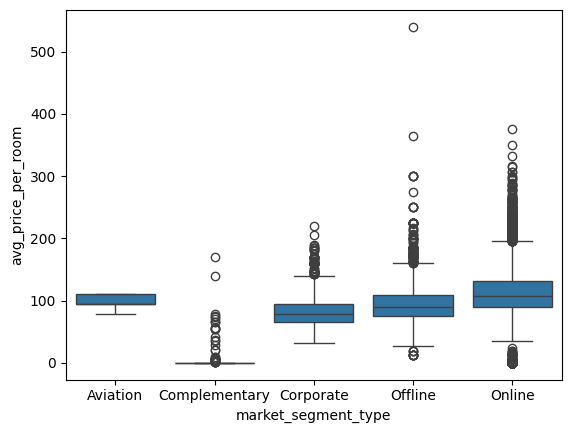

In [ ]:
#create barplot to show mean price for each market segment type
sns.barplot(data=data, x='market_segment_type', y='avg_price_per_room')
plt.show()

#create barplot to show mean, median, range, and outliers of price for each market segment type
sns.boxplot(data=data, x='market_segment_type', y='avg_price_per_room')
plt.show()

Still the same.

- In the offline market segment, they seemed to pay a pretty standard average price per room
- Online typically paid a bit more per room
- Corporate typically paid a bit less, but there are no ouliers on the lower end, so they probably have a set minimum they can pay
- Aviation seems to have a pretty strict minimum and maximum they are able to pay, because athough their average is pretty normal, they have a very small range with no outliers
- Complementary pays the lowest on average by far; although they do have outliers, but the highest outlier is only at about $200 (inexpensive compared to the others)

4. What percentage of bookings are canceled?

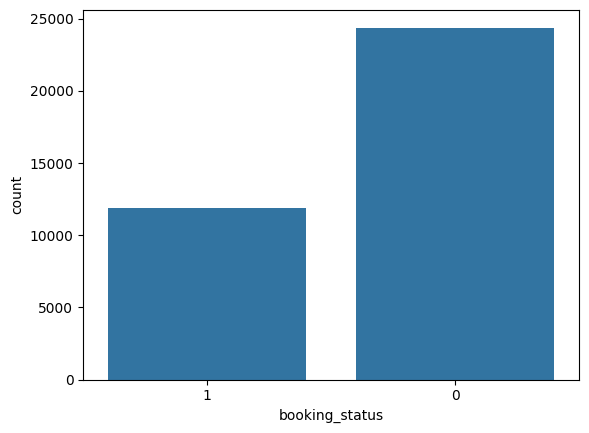

In [ ]:
#create countplot to visualize difference
sns.countplot(data=data, x='booking_status')
plt.show()

In [ ]:
#check actual percentages
data['booking_status'].value_counts(normalize=True)

booking_status
0    0.672364
1    0.327636
Name: proportion, dtype: float64

Still the sam.

The percentage of bookings cancelled waas 32.76% of all bookings. This is almost 1/3 of all the data.

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

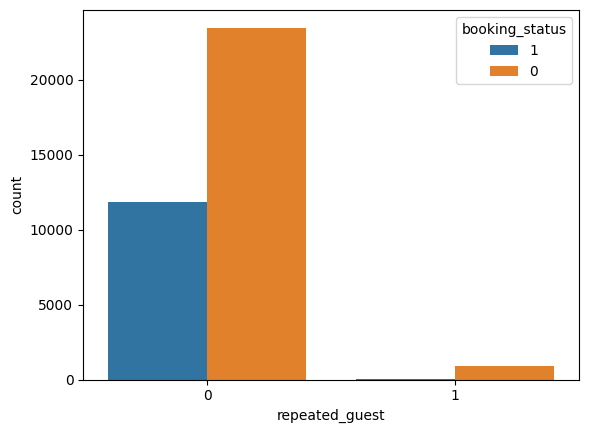

In [ ]:
#create countplot of repeated guests with hue of booking status to visualize difference
sns.countplot(data=data, hue='booking_status', x='repeated_guest')
plt.show()

In [ ]:
data[data['repeated_guest']==1]['booking_status'].value_counts(normalize=True)

booking_status
0    0.982796
1    0.017204
Name: proportion, dtype: float64

Still the same.

Only 1.72% of the repeating guests cancelled.

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

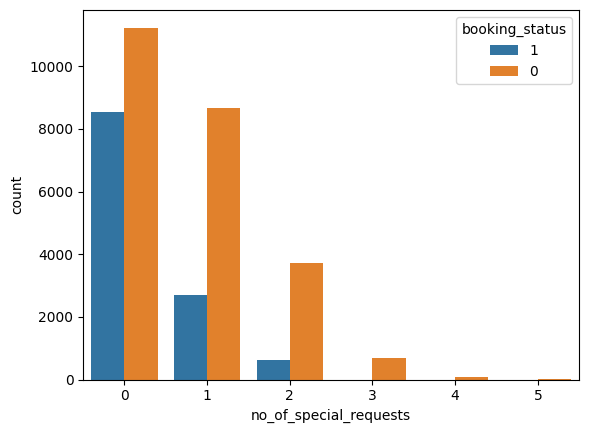

In [ ]:
#Create countplot between booking status and number of special requirements
sns.countplot(data=data, hue='booking_status', x='no_of_special_requests')
plt.show()

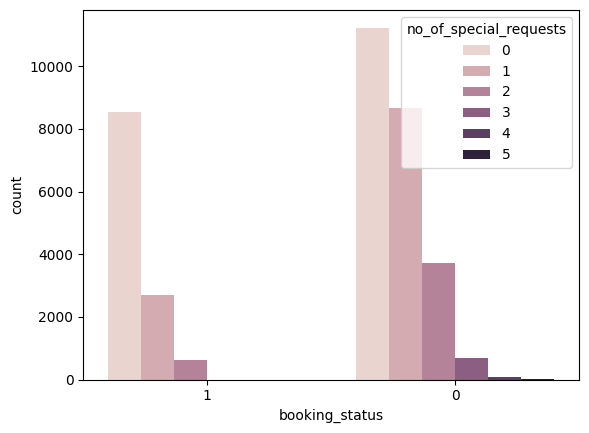

In [ ]:
#Different way of visualizing
sns.countplot(data=data, x='booking_status', hue='no_of_special_requests')
plt.show()

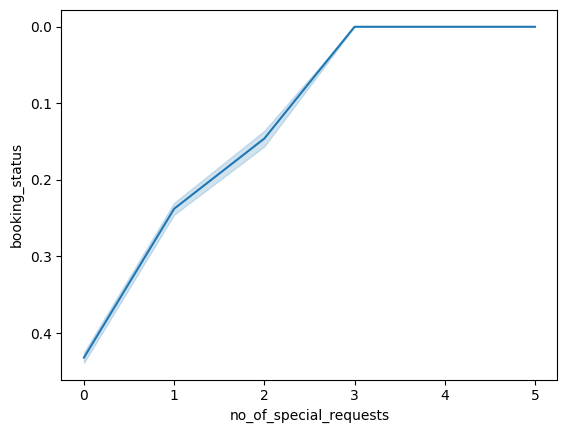

In [ ]:
sns.lineplot(data=data, y='booking_status', x='no_of_special_requests')
plt.show()

Still the same.

Special requirements do not seem to raise cancellation rate; if anything, as special requirements increased, cancellations decreased.

Not much was changed in the data pre-processing, so the EDA did not change.

## Building a Logistic Regression model

In this context, I want to measure the model on F1 score because both Recall and Accuracy are important in this situation.

In [ ]:
#defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5):

    #checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    #rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  #compute Accuracy
    recall = recall_score(target, pred)  #compute Recall
    precision = precision_score(target, pred)  # ompute Precision
    f1 = f1_score(target, pred)  #compute F1-score

    #creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],)

    return df_perf

In [ ]:
#function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
#make x and y variables
X = data.drop(['booking_status'], axis=1)
Y = data['booking_status']

#adding constant
X = sm.add_constant(X)

In [ ]:
#get dummy variables
X = pd.get_dummies(data, columns=["type_of_meal_plan", "room_type_reserved", "market_segment_type"], drop_first=True, dtype=int)

In [ ]:
#X did not drop booking status, so I did it again
X.drop(['booking_status'], axis=1, inplace=True)

X = sm.add_constant(X)

In [ ]:
#splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
#Checking to see how data was split
print('Shape of Training set:', X_train.shape)
print('Shape of test set:', X_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training set: (25392, 28)
Shape of test set: (10883, 28)
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


This is a good proportion of data in each set.

In [ ]:
#fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

print(lg.summary())

         Current function value: 0.425036
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                  0.3293
Time:                        03:04:45   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390

In [ ]:
model_performance_classification_statsmodels(lg, X_train, y_train)

Accuracy    Recall  Precision        F1
0  0.806041  0.634222   0.739749  0.682933

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
#function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    #calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]

    return vif

In [ ]:
#call function for training values
checking_vif(X_train)

feature           VIF
0                                  const  3.946816e+07
1                           no_of_adults  1.348154e+00
2                         no_of_children  1.978229e+00
3                   no_of_weekend_nights  1.069475e+00
4                      no_of_week_nights  1.095667e+00
5             required_car_parking_space  1.039928e+00
6                              lead_time  1.394914e+00
7                           arrival_year  1.430830e+00
8                          arrival_month  1.275673e+00
9                           arrival_date  1.006738e+00
10                        repeated_guest  1.783516e+00
11          no_of_previous_cancellations  1.395689e+00
12  no_of_previous_bookings_not_canceled  1.651986e+00
13                    avg_price_per_room  2.050421e+00
14                no_of_special_requests  1.247278e+00
15         type_of_meal_plan_Meal Plan 2  1.271851e+00
16         type_of_meal_plan_Meal Plan 3  1.025216e+00
17        type_of_meal_plan_Not Selected  1.272183e+00
18        room_type_reserved_Room_Type 2  1.101438e+00
19        room_type_reserved_Room_Type 3  1.003302e+00
20        room_type_reserved_Room_Type 4  1.361515e+00
21        room_type_reserved_Room_Type 5  1.027810e+00
22        room_type_reserved_Room_Type 6  1.973072e+00
23        room_type_reserved_Room_Type 7  1.115123e+00
24     market_segment_type_Complementary  4.500109e+00
25         market_segment_type_Corporate  1.692844e+01
26           market_segment_type_Offline  6.411392e+01
27            market_segment_type_Online  7.117643e+01

arrival_year, market_segment_type_Online, market_segment_type_Offline, and market_segment_type_Corporate (in that order).

We need to drop these columns one by one to see how it affects the model.

We will drop market_segment_type_Online first, as it has the highest multicollinearity.

In [ ]:
#dropping arrival year and assigning to new x_train var
X_train2 = X_train.drop("market_segment_type_Online", axis=1)

In [ ]:
#checking new vif scores
checking_vif2 = pd.Series([variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])], index=X_train2.columns)
print("Series before feature selection: \n\n{}\n".format(checking_vif2))

Series before feature selection: 

const                                   3.939137e+07
no_of_adults                            1.331784e+00
no_of_children                          1.977350e+00
no_of_weekend_nights                    1.069039e+00
no_of_week_nights                       1.095118e+00
required_car_parking_space              1.039795e+00
lead_time                               1.390637e+00
arrival_year                            1.428376e+00
arrival_month                           1.274625e+00
arrival_date                            1.006721e+00
repeated_guest                          1.780188e+00
no_of_previous_cancellations            1.395447e+00
no_of_previous_bookings_not_canceled    1.651745e+00
avg_price_per_room                      2.049595e+00
no_of_special_requests                  1.242418e+00
type_of_meal_plan_Meal Plan 2           1.271497e+00
type_of_meal_plan_Meal Plan 3           1.025216e+00
type_of_meal_plan_Not Selected          1.270387e+00
room_type_r

No more multicollinearity!

Now, we need to drop variables with too high p-values.

I will use function to drop a single-p-value and check the model again, and do this on a loop.

In [ ]:
#initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    #defining the train set
    x_train2_aux = X_train2[cols]

    #fitting the model
    model = sm.Logit(y_train, x_train2_aux).fit(disp=False)

    #getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    #name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


These variables: 'const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline' had an acceptable p-value after dropping variables with too high p-values, meaning these variables accepted the null hypothesis that the correlation coefficient didn't actually equal 0, meaning it does have a significant enough affect on the y variable to be included in the analysis.

In [ ]:
#create new X train and test variables using only the variables listed above that had an acceptable p-value
X_train3 = X_train2[selected_features]
X_test3 = X_test[selected_features]

In [ ]:
#create logistic regression with all variables that did not have multicollinearity, and had a real affect on the y var
logit1 = sm.Logit(y_train, X_train3.astype(float))
lg1 = logit1.fit()
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.425677
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                  0.3283
Time:                        03:04:52   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615    

In [ ]:
#use function to show the accuracy, recall, and f1 score for the above model
model_performance_classification_statsmodels(lg1, X_train3, y_train)

Accuracy    Recall  Precision        F1
0  0.805411  0.632548   0.739033  0.681657

## Model performance evaluation

Converting coefficients to odds

In [ ]:
#converting coefficients to odds
odds = np.exp(lg1.params)

#adding the odds to a dataframe
pd.DataFrame(odds, X_train3.columns, columns=["odds"]).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
odds    0.0      1.114754         1.16436              1.114753   

      no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
odds           1.042636                    0.203048   1.015835      1.573235   

      arrival_month  repeated_guest  ...  no_of_special_requests  \
odds       0.958528        0.064797  ...                0.229941   

      type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
odds                       1.179916                        1.330892   

      room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
odds                        0.700461                         0.75383   

      room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
odds                        0.479403                        0.380991   

      room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
odds                        0.239033                       0.452584   

      market_segment_type_Offline  
odds                     0.167504  

[1 rows x 22 columns]

In [ ]:
# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

#adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train3.columns, columns=["change_odds%"]).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
change_odds% -100.0     11.475363       16.436009             11.475256   

              no_of_week_nights  required_car_parking_space  lead_time  \
change_odds%           4.263629                  -79.695231   1.583521   

              arrival_year  arrival_month  repeated_guest  ...  \
change_odds%     57.323511      -4.147245      -93.520258  ...   

              no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
change_odds%              -77.005947                      17.991562   

              type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
change_odds%                       33.089244                      -29.953888   

              room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
change_odds%                      -24.617006                      -52.059666   

              room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
change_odds%                      -61.900934                      -76.096691   

              market_segment_type_Corporate  market_segment_type_Offline  
change_odds%                     -54.741616                   -83.249628  

[1 rows x 22 columns]

Model performance on training data:

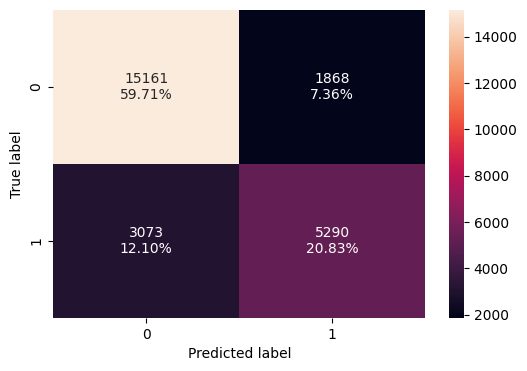

In [ ]:
#creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train3, y_train)

In [ ]:
model_performance_classification_statsmodels(lg1, X_train3, y_train)

Accuracy    Recall  Precision        F1
0  0.805411  0.632548   0.739033  0.681657

Model performance on testing data:

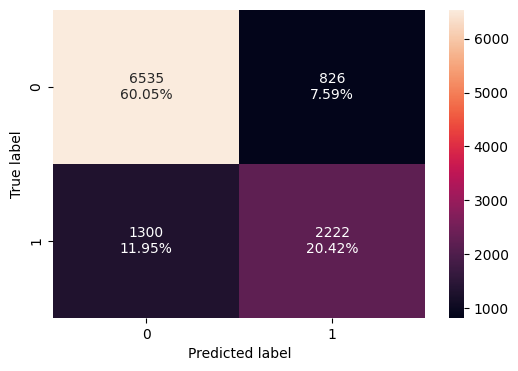

In [ ]:
#creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test3, y_test)

In [ ]:
model_performance_classification_statsmodels(lg1, X_test3, y_test)

Accuracy    Recall  Precision        F1
0  0.804649  0.630892   0.729003  0.676408

Very similar scores for all 4 measures - good

## Final Model Summary

In [ ]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 15 Jun 2024   Pseudo R-squ.:                  0.3283
Time:                        03:04:53   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

No multicollinearity, all acceptable p-values, and ccuracy, recall, precision, and F1 scores are very similar between testing and training data.

## Building a Decision Tree model

Model evaluation criterion

Model can make wrong predictions as:

- Predicting a booking will not cancel but in reality, the booking does cancel (FN)
- Predicting a booking will cancel but in reality, the booking will not cancel (FP)

Which case is more important?

If we predict that a booking will not cancel, but in relity, it does, then the hotel will lose money because it wasted reasources preparing the room for the customer, and wasted money by not scheduling a different booking that they would have profited from.

If we predict the booking will cancel, but in realiry, it does not cancel, then the guests will arrive, and the hotel may not have a romm for them if they scheduled a different booking for that room.
How to reduce the losses?

The company would want the F1 score to be maximized becuase both incorrect predictions would cost the hotel, and are equally important.

In [ ]:
#make function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
#create function to plot the confusion matrix w percentages
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())] for item in cm.flatten()
        ]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
#prepare data for decision tree
#we are using all the variables for the decision tree model because multicollinearity is not a concern when using decision trees

X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

#get dummy vars
X = pd.get_dummies(X, drop_first=True, dtype=int)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print('Shape of Training set:', X_train.shape)
print('Shape of test set:', X_test.shape)

Shape of Training set: (25392, 27)
Shape of test set: (10883, 27)


In [ ]:
#build model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

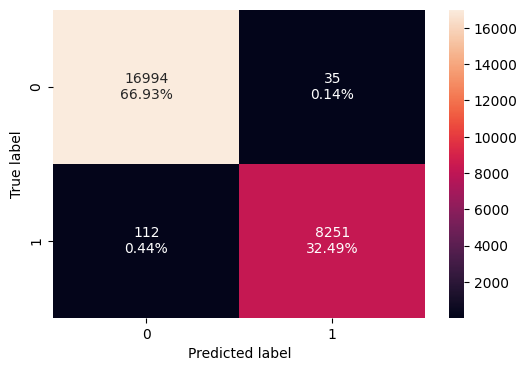

In [ ]:
#check training set perfomance w confusuion matrix before any pruning

confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
#check measure scores for training set
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.994211  0.986608   0.995776  0.991171

Extremely high scores for each measure - even F1, the measure I am looking at

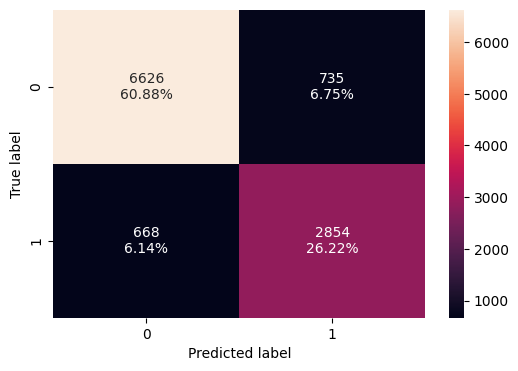

In [ ]:
#check model performance on test set
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
#check measure scores for test set
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision      F1
0  0.871083  0.810335   0.795208  0.8027

A little lower, but still very high scores. However, there is a difference in scores between test and training sets. This indicates overfitting. (This would make sense, as we have not pruned the tree yet).

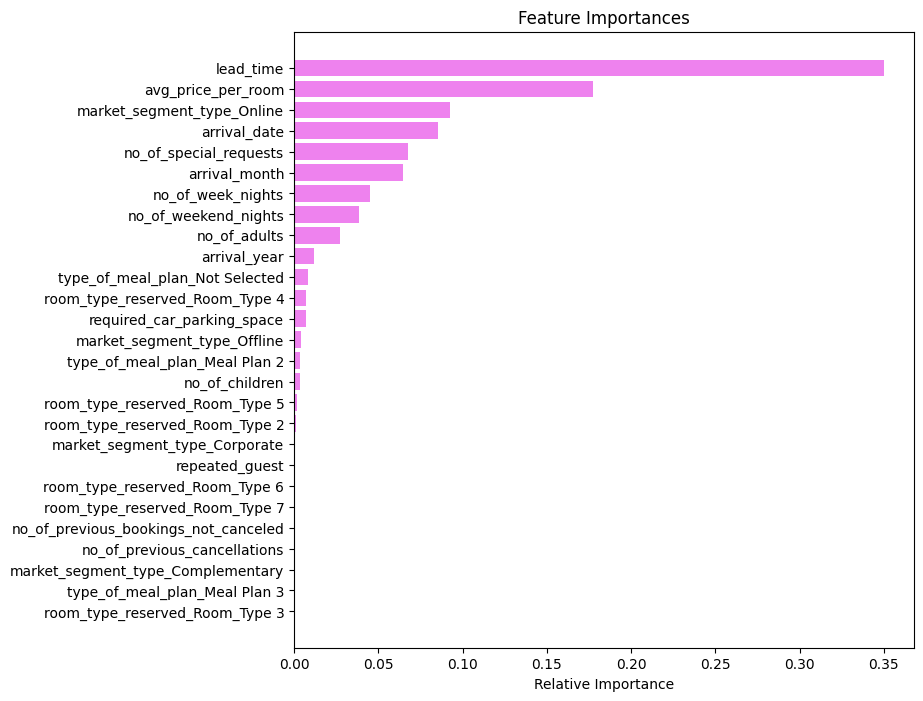

In [ ]:
#check important features

feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

market segment online is the thirst most important variable. This is interesesting because in the regression analysis, we had to cut out this variable because of it's high vif score, meaning it had multicollinearity, which cannot be used in a regression analysis, but it can be used in a decision tree model.

arrival date is the fourth most important variable, which is another variable we had to cut out for the regression analysis.

These variables are probably the reason the testing measures were so much higher for the decision tree model than the regression model.

## Do we need to prune the tree?

We do need to prune the tree because we see evidence of overfitting due to the disparity in measure scores between the training and testing sets.

#### Pre-Pruning

In [ ]:
#choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

#grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

#type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

#run the grid search to find the best combination of hyperparameters
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

#fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

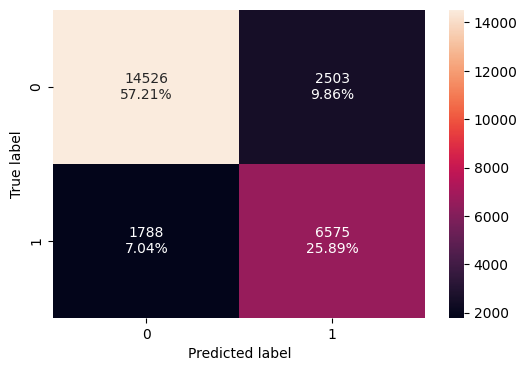

In [ ]:
#make confusion matrix for training data
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
#check measure scores on test set

decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0   0.83101  0.786201   0.724278  0.753971

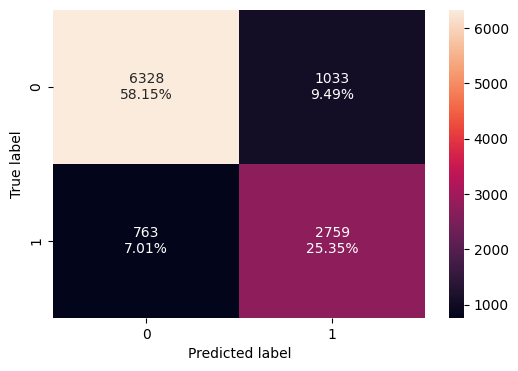

In [ ]:
#make confusion matrix on test set
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
#check measure scores on test set

decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.834972  0.783362   0.727584  0.754444

The scores are still fairly high, and they are extremely close.

This means the model is able to provide more generaalizeable results, so it can more accureately predict on unseen data.

Visualize the Decision Tree

In [ ]:
#create variable w list of all the x vars
feature_names = list(X_train.columns)

#create variable with the importance value of each var
importances = estimator.feature_importances_

#sort the indices of each var by importance (most important variable has its index listed first)
indices = np.argsort(importances)

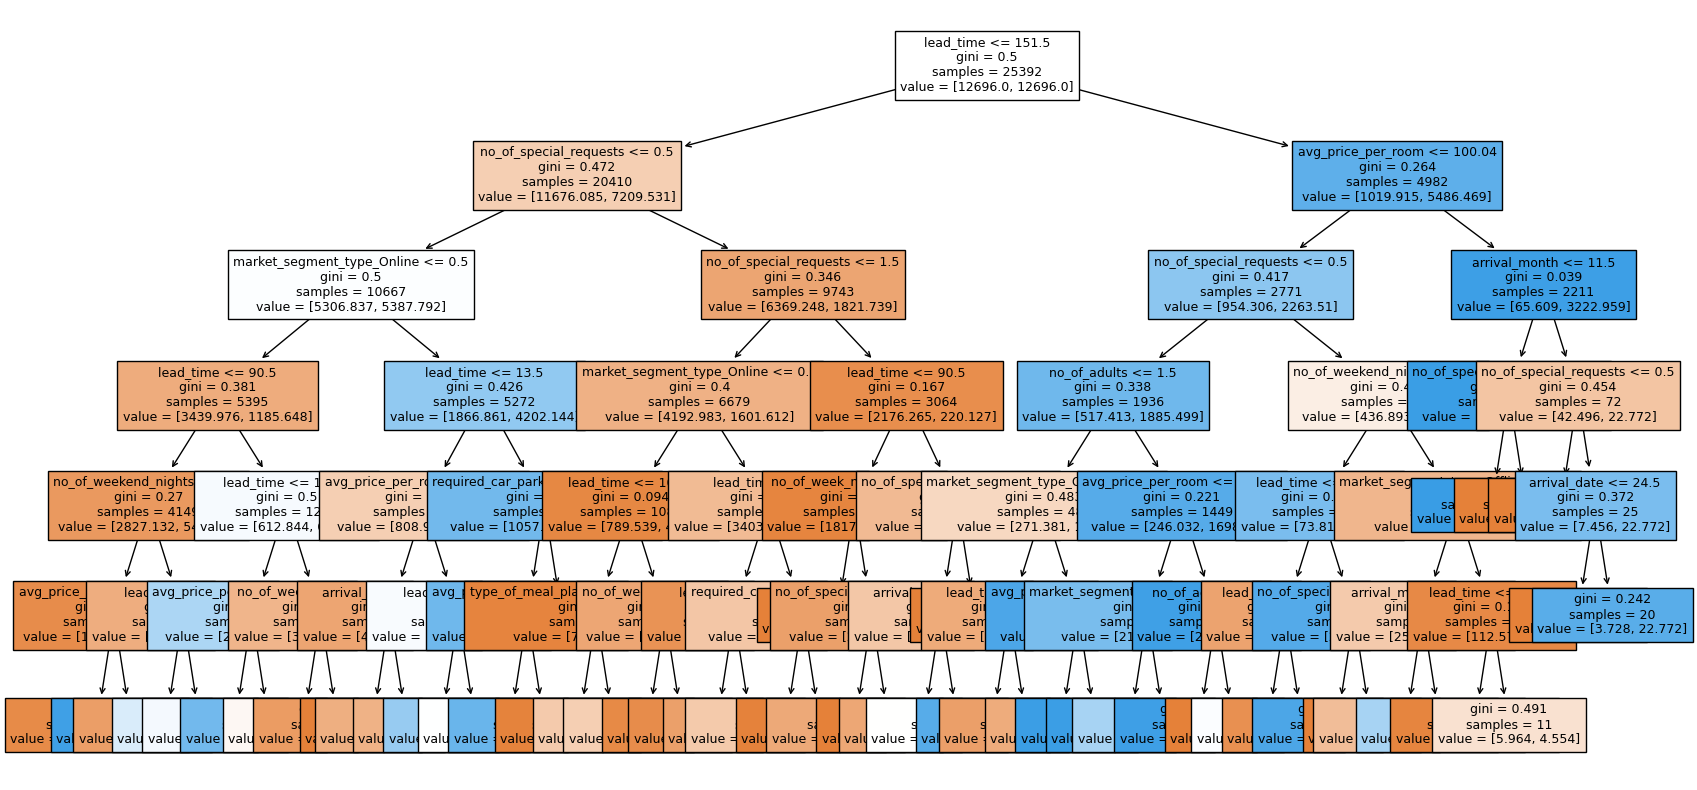

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

We can see this is a very complex tree still

In [ ]:
#text report showing the rules of a decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

From this tree, we are able to see what specific criteria of each variable a datapoint ust meet to fall into class 1 (booking canceled) or class 0 (booking did not cancel).

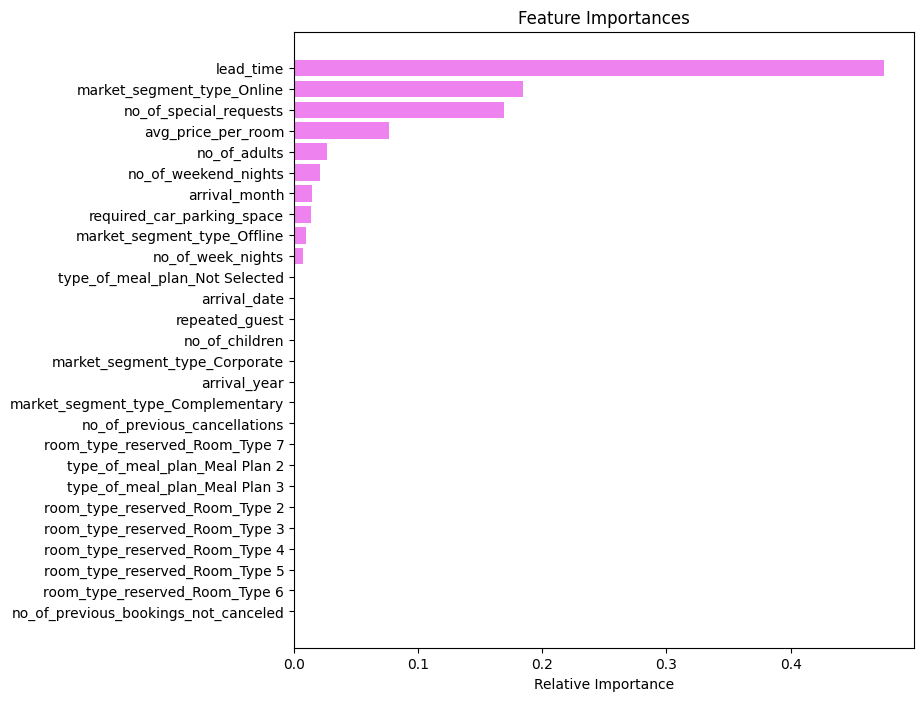

In [ ]:
#Now, I want to check the importance level of each eature in the tree

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

After pruning, we see the importance features have changed dramatically. There are far fewer variables that seem to play a role in determining the classification of the y variable.

Some specific changes are that the average price per room was the second most important variable in the first tree, but now we see it holds a lot less significance if the pruned tree.

The new most important features are: lead time, online market segment, number of annual requests, average price per room, number of adults, number of weekend nights, arrival month, required car parking space, offline market segment, and number of week nights.

#### Now, I will make a model using post-pruning to see if we get better results.

In post-pruning, you build a whole decision tree, then make it less complex by eliminating branches based on which has the smallest alpha. As we increase the amount of branches we eliminate, we are making the tree less complex and more impure.

In [ ]:
#use DecisionTreeClassifier with a specific random state for reproducibility and class_weight set to "balanced" to handle class imbalance
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")

#compute the cost complexity pruning path for the decision tree. This returns the effective alphas (ccp_alphas) and corresponding impurities for the tree
path = clf.cost_complexity_pruning_path(X_train, y_train)

#extract the alpha values and impurities from the path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#take absolute values of ccp_alphas to avoid any issues related to negative alphas
ccp_alphas = abs(ccp_alphas)

In [ ]:
#create a dataframe w the alphas and impurities
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008376
1    -2.710505e-20    0.008376
2     2.933821e-20    0.008376
3     2.933821e-20    0.008376
4     2.933821e-20    0.008376
...            ...         ...
1837  8.901596e-03    0.328058
1838  9.802243e-03    0.337860
1839  1.271875e-02    0.350579
1840  3.412090e-02    0.418821
1841  8.117914e-02    0.500000

[1842 rows x 2 columns]

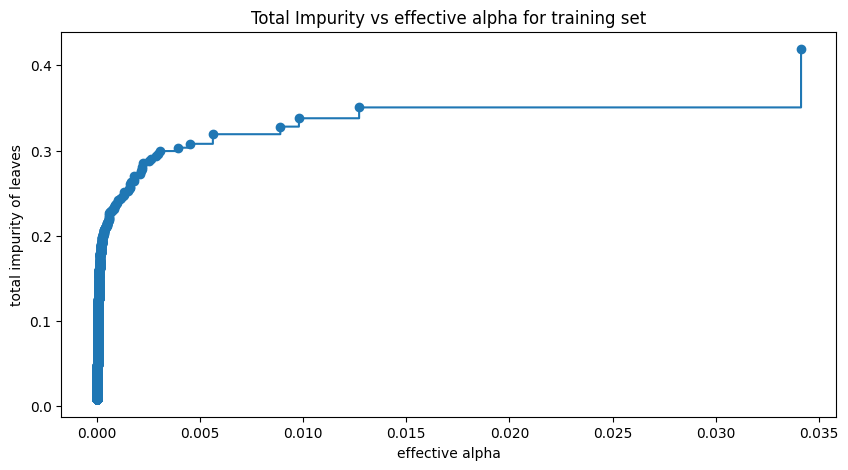

In [ ]:
#plot alphas vs impurities, so we can decide where the most effective point to cut off branches is
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Now, train the decision tree. (As we go further down the list of ccp_alphas, the tree gets less and less complex - last alpha (ccpa_alpha[-1] leaves tree w one node left)

In [ ]:
#initialize list that will contain the trained decision tree classifiers
clfs = []

#loop through the alphas, and for each alpha, create clf var that will contain a classifier, and append to clfs list to create list of classifiers
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


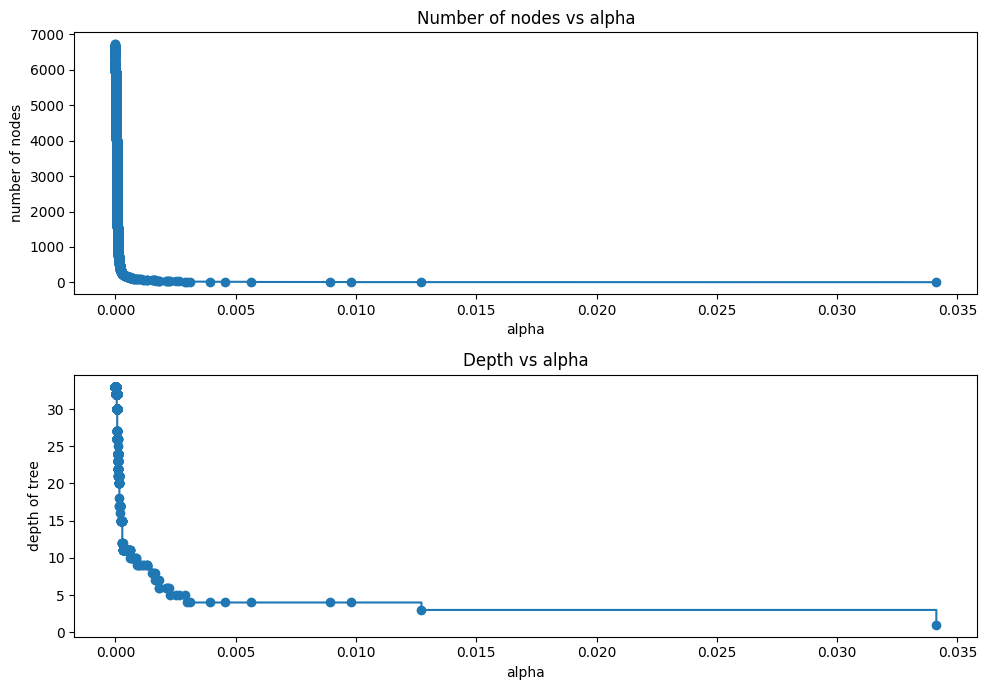

In [ ]:
#we know we don't want the tree with only one node, so we can take that one out now
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#make 2 graphs, one showing the number of nodes vs alpha and the other tree depth vs alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

This graph illustrates that as the alpha increases, the number of nodes and the tree depth decreases.

In [ ]:
#initialize an empty list to store the F1 scores for the training data
f1_train = []

#iterate over each trained classifier in the list of classifiers
for clf in clfs:
    #predict the class labels for the training data using the current classifier
    pred_train = clf.predict(X_train)

    #calculate the F1 score for the training data
    #the F1 score is the harmonic mean of precision and recall, providing a balance between the two
    values_train = f1_score(y_train, pred_train)

    #append the F1 score to the f1_train list
    f1_train.append(values_train)

In [ ]:
#same for test data

#initialize an empty list to store the F1 scores for the testing data
f1_test = []

#iterate over each trained classifier in the list of classifiers
for clf in clfs:
    #predict the class labels for the testing data using the current classifier
    pred_test = clf.predict(X_test)

    #calculate the F1 score for the testing data
    #the F1 score is the harmonic mean of precision and recall, providing a balance between the two
    values_test = f1_score(y_test, pred_test)

    #append the F1 score to the f1_test list
    f1_test.append(values_test)

In [ ]:
#calc training scores for each classifier in the list of classifiers
#clf.score(X_train, y_train) returns the mean accuracy on the given training data and labels
train_scores = [clf.score(X_train, y_train) for clf in clfs]

#same for test
test_scores = [clf.score(X_test, y_test) for clf in clfs]

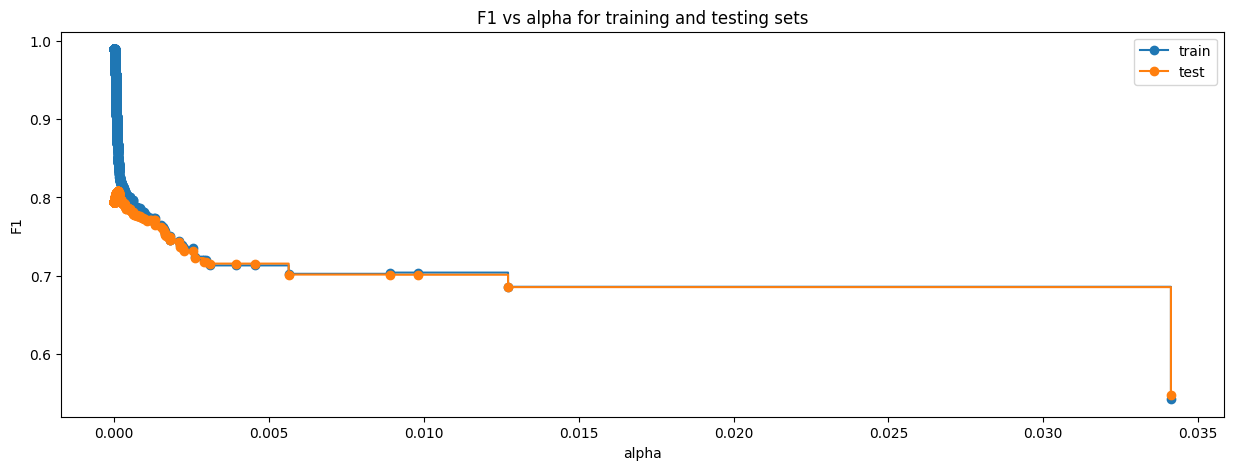

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#creating the model where we get highest train and test f1
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001226763315516701, class_weight='balanced',
                       random_state=1)


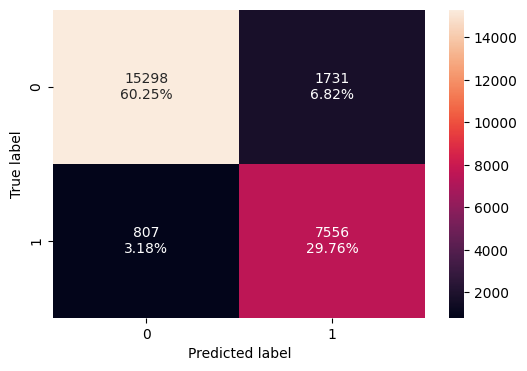

In [ ]:
#confusion matrix for best model training data
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
#measures for best model training data

decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.900047  0.903504    0.81361  0.856204

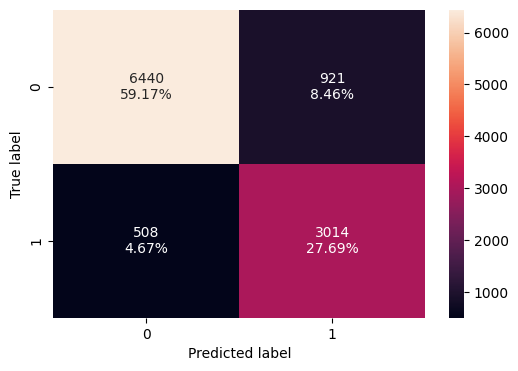

In [ ]:
#confusion matrix for best model testing data
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
#measures for best model testing data

decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy    Recall  Precision        F1
0  0.868694  0.855764   0.765947  0.808368

All the measures are pretty close, especially the f1 measure, which is the measure we are most concerned with. This means the post-pruned model is also producing generalizable results, which means it is effective at predicting on unseen data.

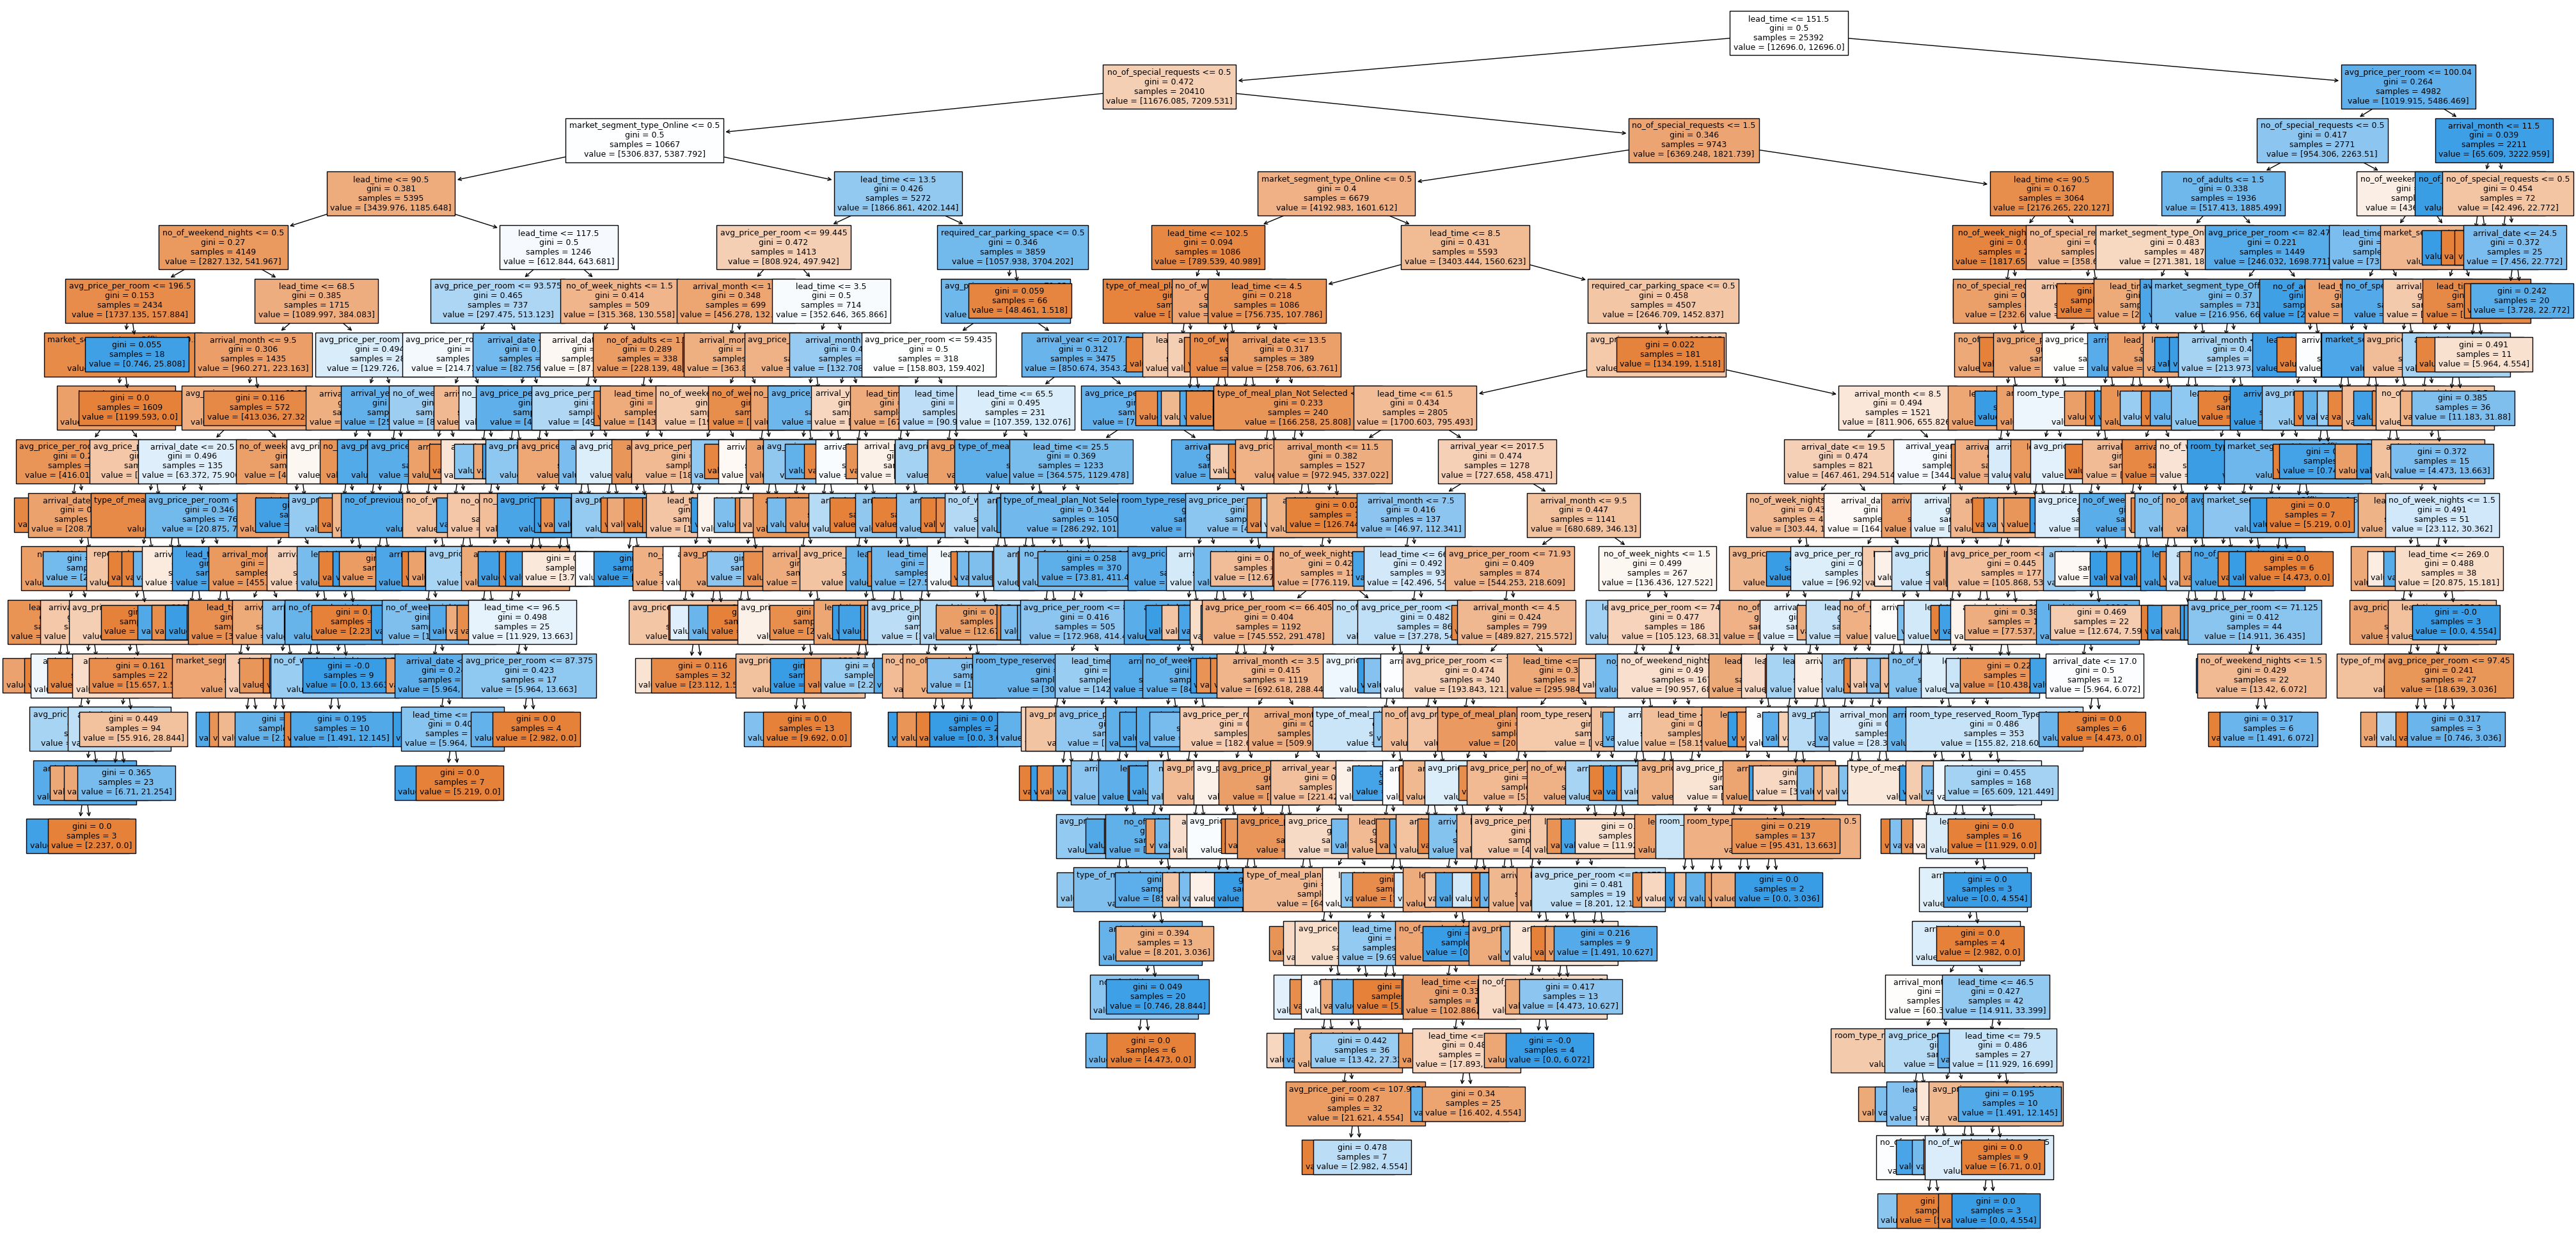

In [ ]:
#visualizing new post-pruned decision tree

plt.figure(figsize=(50, 25))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Still, a very complex tree; however, from the measure results, we know it is not suffering from overfitting, so the complexity should not be an issue

In [ ]:
#text report showing the rules of a decision tree

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

The F1 scores were higher for the post-pruned tree, meaning it gave a better precision and recall; but the scores for the testing and training data were closer together for the pre-pruned tree, meaning it gave more generalizable results.

Let's see how the importance features changed for the post-pruned tree

In [ ]:
#same thing as before - make list of the indices of features in order of importance
importances = best_model.feature_importances_
indices = np.argsort(importances)

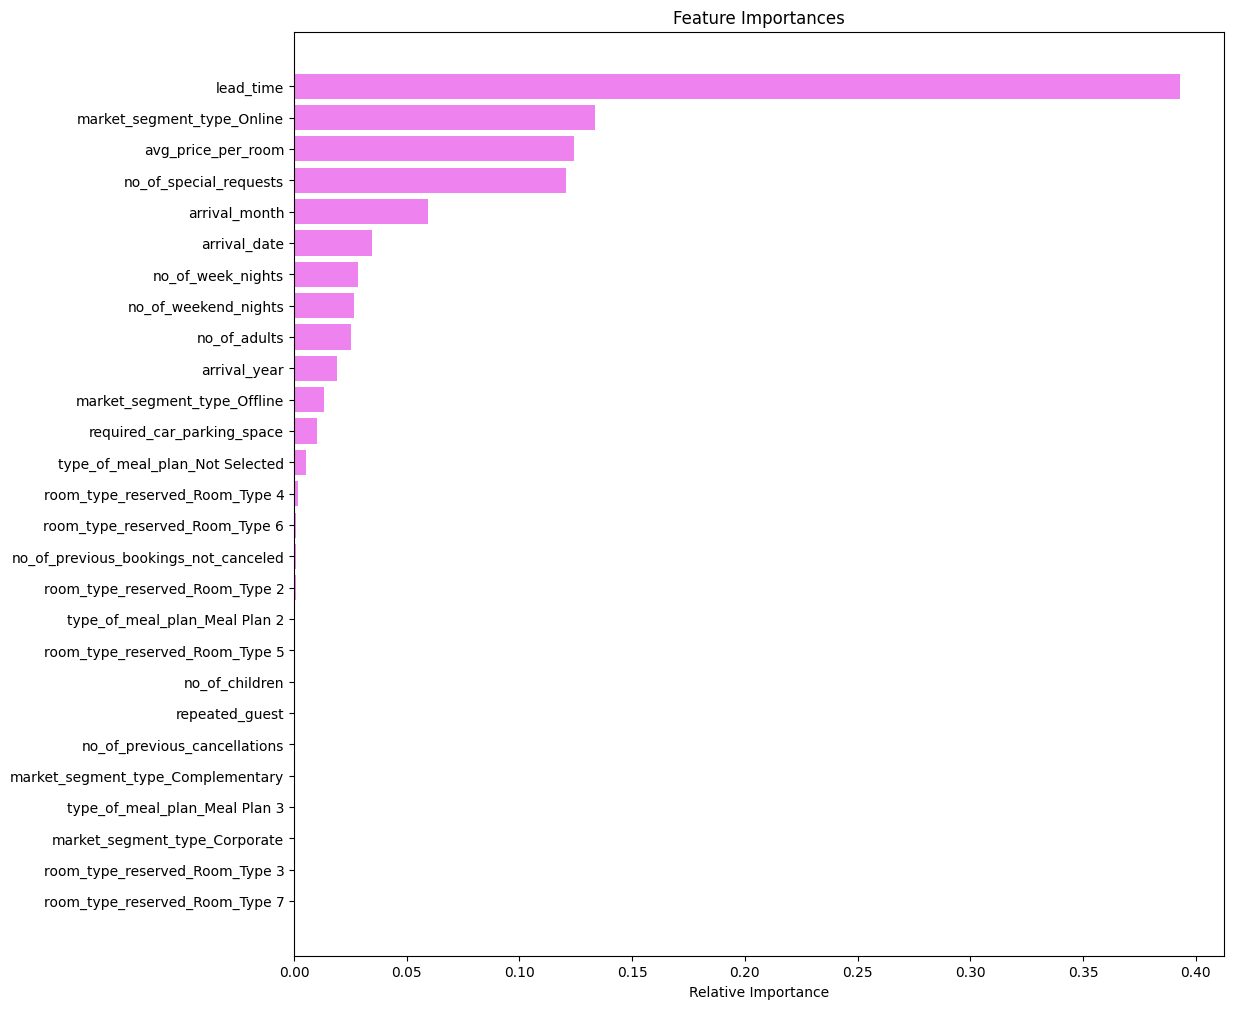

In [ ]:
#graph the order to visualize it to compare

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The importance features are pretty similar to the pre-pruned tree,; however, some have slightly different placement, and the post-pruned tree deemed more features of higher importance values.

## Model Performance Comparison and Conclusions

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.994211                     0.831010   
Recall                  0.986608                     0.786201   
Precision               0.995776                     0.724278   
F1                      0.991171                     0.753971   

           Decision Tree (Post-Pruning)  
Accuracy                       0.900047  
Recall                         0.903504  
Precision                      0.813610  
F1                             0.856204

In [ ]:
#testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.871083                     0.834972   
Recall                  0.810335                     0.783362   
Precision               0.795208                     0.727584   
F1                      0.802700                     0.754444   

           Decision Tree (Post-Pruning)  
Accuracy                       0.868694  
Recall                         0.855764  
Precision                      0.765947  
F1                             0.808368

Since both of the possible errors in the predictive model (false positives and false negatives) are equally important in this context, I want to prioritize having a high f1 score. Becuase of this I think the best fit model would be the post-pruned decision tree with a f1 score of 0.808.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

- The model built can be used to predict if a hotel room booking is going to cancel or not and can correctly identify 85.6% of the canceled bookings.

- The amount of time in advance the room was booked, whether the market segment type was online, and the average price per room were the most important variables in predicting whether a a booking will be cancelled or not.


- From the decision tree, it has been observed that if the lead time is less than or equal to 16.50, the number of special requests is less than or equal to 0.5, it is not from the market segment online, the number of weekend nights the booking is for is less than or equal to 0.5, the average price per room is less than or equal to 68.50, it is not from the market segment offline, and the arrival date is the 30th of the month or later, the booking is likley to cancel.
  - The company should give a vigilant eye for these values in order to detect machine failure. However, there are a number or these combinations that could be a signal that the booking will cancel, and it would be impossible to memorize each combination. So, I reccommend the hotel company creates a website through which the customers can book their hotel, and for each booking, the website runs it through the post-pruned predictive model created above, and if it falls into the 1 categpry (predictedd to cancel), the manager is notified, and they are able to rearrange or plan accordingly.

- The profitable policies for cancellations and refunds that I would advise the hotel to adopt is that if a booking fits the above criteria, or any of the other combinations predicted to fall into the cancelled category, they arrange for at least half of these bookings to be cancelled, and fill the room with a different booking instead. That way, in case they do not cancel even if they were predicted to (False positive), there would likley still be an empty room for them, but if they do cancel, at least half of the cancelled bookings were rebooked in preparation, and the hotel significantly decreases their financial losses from cancellations.

- Another suggestion I have for the hotel company is that because the data provided for this analysis was from part of 2017 through 2018, I would advise the company to continue collecting this same data (mostly the important features though), and provide it to a data scientist to re-perform this analysis so they can get more up to date results.

In [ ]:
!jupyter nbconvert PROJECT4_fullcode2.ipynb --to html

[NbConvertApp] Converting notebook PROJECT4_fullcode2.ipynb to html
[NbConvertApp] Writing 7797065 bytes to PROJECT4_fullcode2.html
